In [144]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aid-escalating-internet-coverage/sample_submission.csv
/kaggle/input/aid-escalating-internet-coverage/train.csv
/kaggle/input/aid-escalating-internet-coverage/test.csv
/kaggle/input/aid-escalating-internet-coverage/page_information/page_information/5550
/kaggle/input/aid-escalating-internet-coverage/page_information/page_information/3347
/kaggle/input/aid-escalating-internet-coverage/page_information/page_information/437
/kaggle/input/aid-escalating-internet-coverage/page_information/page_information/9350
/kaggle/input/aid-escalating-internet-coverage/page_information/page_information/7521
/kaggle/input/aid-escalating-internet-coverage/page_information/page_information/5459
/kaggle/input/aid-escalating-internet-coverage/page_information/page_information/10512
/kaggle/input/aid-escalating-internet-coverage/page_information/page_information/10514
/kaggle/input/aid-escalating-internet-coverage/page_information/page_information/4951
/kaggle/input/aid-escalating-internet-cover

## EDA

In [145]:
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt

## description of dataset


link: URL of the webpage to be classified

page_description: Description of the webpage

alchemy_category: Alchemy category (per the publicly available Alchemy API found at www.alchemyapi.com)

alchemy_category_score: Alchemy category score (per the publicly available Alchemy API found at www.alchemyapi.com)

avg_link_size: Average number of words in a webpage

common_word_link_ratio_1: # of links sharing at least 1 word with 1 other links / # of links

common_word_link_ratio_2: # of links sharing at least 1 word with 2 other links / # of links

common_word_link_ratio_3: # of links sharing at least 1 word with 3 other links / # of links

common_word_link_ratio_4: # of links sharing at least 1 word with 4 other links / # of links

compression_ratio: Measure of redundancy computed by finding the 
compression achieved on this web page via gzip

embed_ratio: Count of tags or simply the number of usages.

frame_based: Binary indication of whether a webpage has frameset markup

frame_tag_ratio: Ratio of frameset markups over total markups

has_domain_link: Binary indication of whether the webpage contains in URL with a domain

html_ratio: Ratio of tags vs text on the page

image_ratio: Ratio of  tags vs text in the page

is_news: This is true(1) if this webpage is news

lengthy_link_domain: This is true (1) if the webpage's text contains more than 30 alpha-numeric characters

link_word_score: Percentage of words on the webpage that are also in the hyperlink text

news_front_page: True (1) if StumbleUpon's news classifier determines that this webpage is front-page news

non_markup_alphanumeric_characters: Number of alpha-numeric characters in webpage's text

count_of_links: Number of markups

number_of_words_in_url: Number of words in URL

parametrized_link_ratio: A link is parametrized if its URL contains parameters or has an attached onClick event

spelling_mistakes_ratio: Ratio of words not found in the wiki (considered to be a spelling mistake)

label: The label value of 0 represents that the webpage is not "ad-worthy", and a label value of 1 represents that the webpage is "ad-worthy". This is available only for train.csv.

In [146]:
# replacing missing values with nan

missing_values = ['?','--','-','??','.','unknown']
train_data=pd.read_csv("../input/aid-escalating-internet-coverage/train.csv",na_values=missing_values)
test_data=pd.read_csv("../input/aid-escalating-internet-coverage/test.csv",na_values=missing_values)


In [147]:
## merging train and test csv for applying preprocessing to combine dataset
# data = pd.concat(frames)
data=train_data.copy()
data2=test_data.copy()
# data.shape
train=data.drop(labels=["label"],axis=1)
print(train.shape)
test=data2
print(test.shape)
ultdf=[train,test]
finaldf=pd.concat(ultdf).reset_index(drop=True)
print(finaldf.shape)

(4437, 26)
(2958, 26)
(7395, 26)


finaldf is the combined entire dataset with all '?' replaced with NaN

Checking the page description for a link ID

In [148]:
finaldf.loc[finaldf["link_id"]==10109]["page_description"]

298    {"title":"BBC NEWS Health Depression link to p...
Name: page_description, dtype: object

In [149]:
#columns / features with na values
finaldf.columns[finaldf.isna().any()].tolist()

['alchemy_category', 'alchemy_category_score', 'is_news', 'news_front_page']

In [150]:
finaldf["is_news"].value_counts()
#is_news is only having null or 1

1.0    4552
Name: is_news, dtype: int64

In [151]:
finaldf["frame_based"].value_counts()
#frame_based has only 0

0    7395
Name: frame_based, dtype: int64

In [152]:
#dropping frame_based
finaldf.drop(labels=["frame_based"],axis=1,inplace=True)

In [153]:
for c in finaldf.columns:
    print(finaldf[c].unique())

['http://www.cbc.ca/stevenandchris/2012/11/peggy-ks-sexy-mood-boosting-cupcakes.html'
 'http://www.instructables.com/id/Vegan-Baked-Potato-amp-Spinach-Balls-Fat-Free/'
 'http://www.oled-info.com/toshiba-shows-ultra-thin-flexible-3-oled-display-prototype'
 ... 'http://emptees.com/'
 'http://www.theonion.com/content/news/cost_of_living_now_outweighs'
 'http://6jokes.com/just-hanging-on-the-wall/']
[7426 8430 3469 ... 5494 9302 2633]
['{"url":"cbc ca stevenandchris 2012 11 peggy ks sexy mood boosting cupcakes html","title":"Steven and Chris Peggy K s Sexy Mood Boosting Cupcakes peggy k\'s sexy mood-boosting cupcakes from steven and chris","body":"If you re ready to give your libido a boost with a sweet treat then you re going to want to try Peggy K s sexy mood boosting cupcakes Wet ingredients 1 tablespoon ground chia mixed with 1 4 cup water1 1 2 ripe banana2 tablespoons coconut oil\\u00bd cup walnut butter 2 teaspoon s vanilla extract1 cup almond milk \\u00bd cup coconut sugar Dry ingre

In [154]:
finaldf.nunique()

link                                  7395
link_id                               7395
page_description                      7394
alchemy_category                        12
alchemy_category_score                4805
avg_link_size                         5710
common_word_link_ratio_1              4476
common_word_link_ratio_2              4038
common_word_link_ratio_3              3266
common_word_link_ratio_4              2695
compression_ratio                     6453
embed_ratio                            366
frame_tag_ratio                       5911
has_domain_link                          2
html_ratio                            7376
image_ratio                           5418
is_news                                  1
lengthy_link_domain                      2
link_word_score                        101
news_front_page                          2
non_markup_alphanumeric_characters    5301
count_of_links                         702
number_of_words_in_url                  23
parametrize

### checking for duplicate rows

In [155]:
print(finaldf.duplicated().sum())


0


### checking numerical features

In [156]:
finaldf.describe()

link_id  alchemy_category_score  avg_link_size  \
count   7395.000000             5053.000000    7395.000000   
mean    5305.704665                0.603334       2.761823   
std     3048.384114                0.212864       8.619793   
min        1.000000                0.070833       0.000000   
25%     2688.500000                0.452424       1.602062   
50%     5304.000000                0.625616       2.088235   
75%     7946.500000                0.780851       2.627451   
max    10566.000000                0.999426     363.000000   

       common_word_link_ratio_1  common_word_link_ratio_2  \
count               7395.000000               7395.000000   
mean                   0.468230                  0.214080   
std                    0.203133                  0.146743   
min                    0.000000                  0.000000   
25%                    0.340370                  0.105263   
50%                    0.481481                  0.202454   
75%                    0.616604                  0.300000   
max                    1.000000                  1.000000   

       common_word_link_ratio_3  common_word_link_ratio_4  compression_ratio  \
count               7395.000000               7395.000000        7395.000000   
mean                   0.092062                  0.049262           2.255103   
std                    0.095978                  0.072629           5.704313   
min                    0.000000                  0.000000           0.000000   
25%                    0.022222                  0.000000           0.442616   
50%                    0.068627                  0.022222           0.483680   
75%                    0.133333                  0.065065           0.578227   
max                    0.980392                  0.980392          21.000000   

       embed_ratio  frame_tag_ratio  ...  image_ratio  is_news  \
count  7395.000000      7395.000000  ...  7395.000000   4552.0   
mean     -0.103750         0.056423  ...     0.275709      1.0   
std       0.306545         0.041446  ...     1.919320      0.0   
min      -1.000000         0.000000  ...    -1.000000      1.0   
25%       0.000000         0.028502  ...     0.025900      1.0   
50%       0.000000         0.045775  ...     0.083051      1.0   
75%       0.000000         0.073459  ...     0.236700      1.0   
max       0.250000         0.444444  ...   113.333333      1.0   

       lengthy_link_domain  link_word_score  news_front_page  \
count          7395.000000      7395.000000      6147.000000   
mean              0.660311        30.077079         0.047828   
std               0.473636        20.393101         0.213420   
min               0.000000         0.000000         0.000000   
25%               0.000000        14.000000         0.000000   
50%               1.000000        25.000000         0.000000   
75%               1.000000        43.000000         0.000000   
max               1.000000       100.000000         1.000000   

       non_markup_alphanumeric_characters  count_of_links  \
count                         7395.000000     7395.000000   
mean                          5716.598242      178.754564   
std                           8875.432430      179.466198   
min                              0.000000        1.000000   
25%                           1579.000000       82.000000   
50%                           3500.000000      139.000000   
75%                           6377.000000      222.000000   
max                         207952.000000     4997.000000   

       number_of_words_in_url  parametrized_link_ratio  \
count             7395.000000              7395.000000   
mean                 4.960649                 0.172864   
std                  3.233111                 0.183286   
min                  0.000000                 0.000000   
25%                  3.000000                 0.040984   
50%                  5.000000                 0.113402   
75%                  7.000000                 0.241299

In [157]:
finaldf['has_domain_link'].value_counts()


0    7238
1     157
Name: has_domain_link, dtype: int64

In [158]:
finaldf['html_ratio'].describe()


count    7395.000000
mean        0.233778
std         0.052487
min         0.045564
25%         0.201061
50%         0.230564
75%         0.260770
max         0.716883
Name: html_ratio, dtype: float64

In [159]:
finaldf['has_domain_link'].value_counts()


0    7238
1     157
Name: has_domain_link, dtype: int64

'has_domain_link' is highly imbalanced

imbalance is very apparent we can test the model with and without this feature..

In [160]:
finaldf['lengthy_link_domain'].value_counts()


1    4883
0    2512
Name: lengthy_link_domain, dtype: int64

Checking the correlation among the features

In [161]:
finaldf.corr()


link_id  alchemy_category_score  \
link_id                             1.000000                0.007229   
alchemy_category_score              0.007229                1.000000   
avg_link_size                      -0.011162               -0.014264   
common_word_link_ratio_1            0.002856                0.118382   
common_word_link_ratio_2            0.008407                0.075179   
common_word_link_ratio_3            0.005285                0.043958   
common_word_link_ratio_4            0.009573                0.025410   
compression_ratio                  -0.007343               -0.154228   
embed_ratio                         0.013340                0.125943   
frame_tag_ratio                     0.010065               -0.069614   
has_domain_link                    -0.005802                0.027408   
html_ratio                          0.016989               -0.015281   
image_ratio                        -0.000590               -0.044715   
is_news                                  NaN                     NaN   
lengthy_link_domain                -0.007780                0.158553   
link_word_score                    -0.013668               -0.073564   
news_front_page                     0.027393               -0.039528   
non_markup_alphanumeric_characters  0.016732                0.093068   
count_of_links                     -0.002019                0.071610   
number_of_words_in_url             -0.017342                0.183589   
parametrized_link_ratio            -0.005868               -0.015486   
spelling_mistakes_ratio             0.002292               -0.109215   

                                    avg_link_size  common_word_link_ratio_1  \
link_id                                 -0.011162                  0.002856   
alchemy_category_score                  -0.014264                  0.118382   
avg_link_size                            1.000000                  0.120467   
common_word_link_ratio_1                 0.120467                  1.000000   
common_word_link_ratio_2                 0.161769                  0.808047   
common_word_link_ratio_3                 0.174554                  0.560584   
common_word_link_ratio_4                 0.134527                  0.388801   
compression_ratio                       -0.003578                 -0.017878   
embed_ratio                              0.005254                  0.005280   
frame_tag_ratio                         -0.049270                 -0.294860   
has_domain_link                         -0.002046                  0.006790   
html_ratio                               0.018974                 -0.201501   
image_ratio                             -0.003002                 -0.064435   
is_news                                       NaN                       NaN   
lengthy_link_domain                      0.020852                  0.421284   
link_word_score                          0.122550                  0.257200   
news_front_page                         -0.017364                  0.036598   
non_markup_alphanumeric_characters      -0.010982                  0.193914   
count_of_links                           0.000360                  0.317293   
number_of_words_in_url                  -0.033890                  0.144354   
parametrized_link_ratio                  0.006089                 -0.078026   
spelling_mistakes_ratio                  0.035393                 -0.035019   

                                    common_word_link_ratio_2  \
link_id                                             0.008407   
alchemy_category_score                              0.075179   
avg_link_size                                       0.161769   
common_word_link_ratio_1                            0.808047   
common_word_link_ratio_2                            1.000000   
common_word_link_ratio_3                            0.758330   
common_word_link_ratio_4                            0.555148   
compression_ratio                                 

common_word_link_ratio_1 ,common_word_link_ratio_2 common_word_link_ratio_3  are highly correlated and also, common_word_link_ratio_3 are highly  correlated with common_word_link_ratio_4  and embedded ratio and commpressed ratio are highly correlated

In [162]:

finaldf.drop(labels=["embed_ratio", "common_word_link_ratio_2", "common_word_link_ratio_3"], axis=1,inplace=True)

In [163]:
finaldf.describe()

link_id  alchemy_category_score  avg_link_size  \
count   7395.000000             5053.000000    7395.000000   
mean    5305.704665                0.603334       2.761823   
std     3048.384114                0.212864       8.619793   
min        1.000000                0.070833       0.000000   
25%     2688.500000                0.452424       1.602062   
50%     5304.000000                0.625616       2.088235   
75%     7946.500000                0.780851       2.627451   
max    10566.000000                0.999426     363.000000   

       common_word_link_ratio_1  common_word_link_ratio_4  compression_ratio  \
count               7395.000000               7395.000000        7395.000000   
mean                   0.468230                  0.049262           2.255103   
std                    0.203133                  0.072629           5.704313   
min                    0.000000                  0.000000           0.000000   
25%                    0.340370                  0.000000           0.442616   
50%                    0.481481                  0.022222           0.483680   
75%                    0.616604                  0.065065           0.578227   
max                    1.000000                  0.980392          21.000000   

       frame_tag_ratio  has_domain_link   html_ratio  image_ratio  is_news  \
count      7395.000000      7395.000000  7395.000000  7395.000000   4552.0   
mean          0.056423         0.021231     0.233778     0.275709      1.0   
std           0.041446         0.144162     0.052487     1.919320      0.0   
min           0.000000         0.000000     0.045564    -1.000000      1.0   
25%           0.028502         0.000000     0.201061     0.025900      1.0   
50%           0.045775         0.000000     0.230564     0.083051      1.0   
75%           0.073459         0.000000     0.260770     0.236700      1.0   
max           0.444444         1.000000     0.716883   113.333333      1.0   

       lengthy_link_domain  link_word_score  news_front_page  \
count          7395.000000      7395.000000      6147.000000   
mean              0.660311        30.077079         0.047828   
std               0.473636        20.393101         0.213420   
min               0.000000         0.000000         0.000000   
25%               0.000000        14.000000         0.000000   
50%               1.000000        25.000000         0.000000   
75%               1.000000        43.000000         0.000000   
max               1.000000       100.000000         1.000000   

       non_markup_alphanumeric_characters  count_of_links  \
count                         7395.000000     7395.000000   
mean                          5716.598242      178.754564   
std                           8875.432430      179.466198   
min                              0.000000        1.000000   
25%                           1579.000000       82.000000   
50%                           3500.000000      139.000000   
75%                           6377.000000      222.000000   
max                         207952.000000     4997.000000   

       number_of_words_in_url  parametrized_link_ratio  \
count             7395.000000              7395.000000   
mean                 4.960649                 0.172864   
std                  3.233111                 0.183286   
min                  0.000000                 0.000000   
25%                  3.000000                 0.040984   
50%                  5.000000                 0.113402   
75%                  7.000000                 0.241299   
max                 22.000000                 1.000000   

       spelling_mistakes_ratio  
count              7395.000000  
mean                  0.101221  
std                   0.079231  
min                   0.000000  
25%                   0.068739  
50%                   0.089312  
75%                   0.112376  
max                   1.000000

### outlier detection and removal

Functions for OutlierPlot and IQR Method of Outlier Detection

In [164]:
def outlierPlot(p):
    sns.boxplot(x=p)
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.distplot(p)

#function for getting upper and lower limit
def limits(columnName):
    percentile25 = columnName.quantile(0.25)
    percentile75 = columnName.quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    return upper_limit,lower_limit

#function caps i.e outlier removal
def capping(df,upper_limit,lower_limit,column_name):
    new_df_cap = df.copy()
    new_df_cap[column_name] = np.where(
    new_df_cap[column_name] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap[column_name] < lower_limit,
        lower_limit,
        new_df_cap[column_name]
        )
    )
    return new_df_cap[column_name]


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


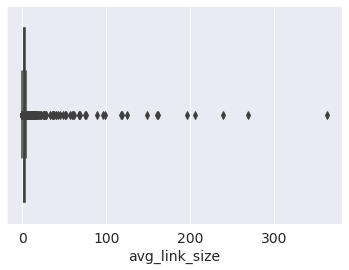

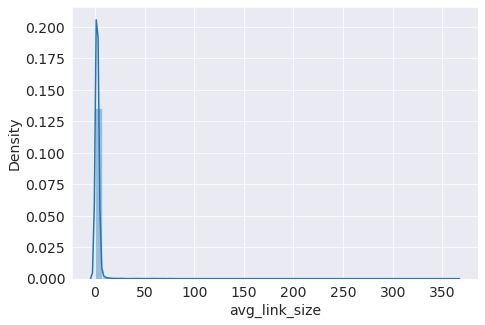

In [165]:
outlierPlot(finaldf['avg_link_size'])


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


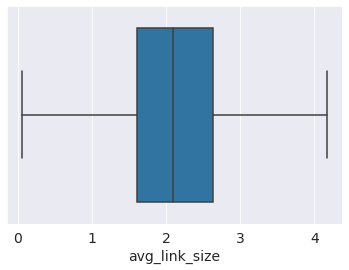

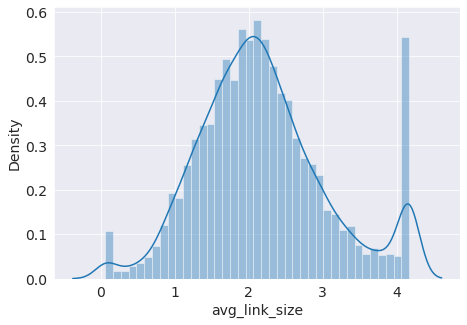

In [166]:
upper_limit,lower_limit = limits(finaldf['avg_link_size'])
finaldf['avg_link_size'] = capping(finaldf,upper_limit,lower_limit,'avg_link_size')
outlierPlot(finaldf['avg_link_size'])


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


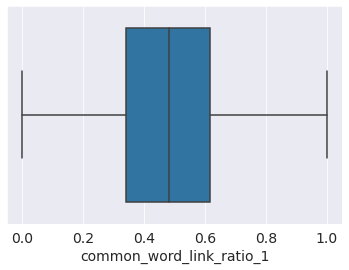

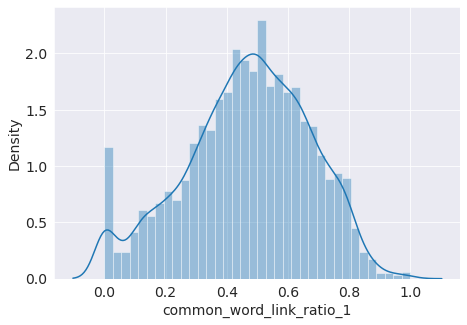

In [167]:
outlierPlot(finaldf['common_word_link_ratio_1'])
#no outliers found


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


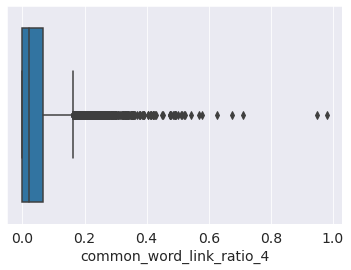

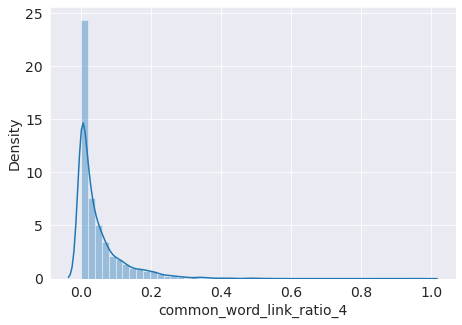

In [168]:
outlierPlot(finaldf['common_word_link_ratio_4'])


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


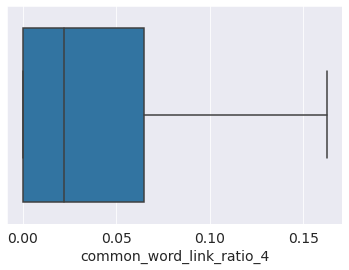

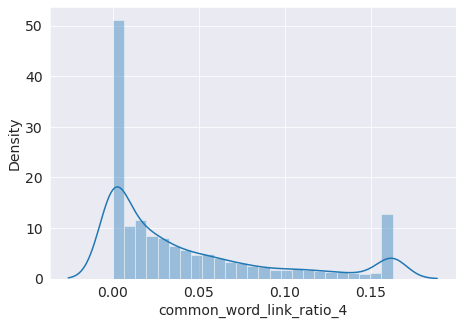

In [169]:
upper_limit,lower_limit = limits(finaldf['common_word_link_ratio_4'])
finaldf['common_word_link_ratio_4'] = capping(finaldf,upper_limit,lower_limit,'common_word_link_ratio_4')
outlierPlot(finaldf['common_word_link_ratio_4'])


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


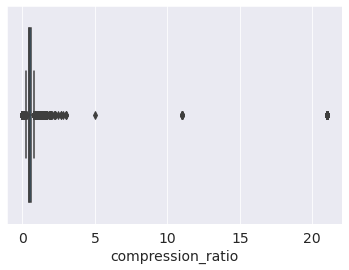

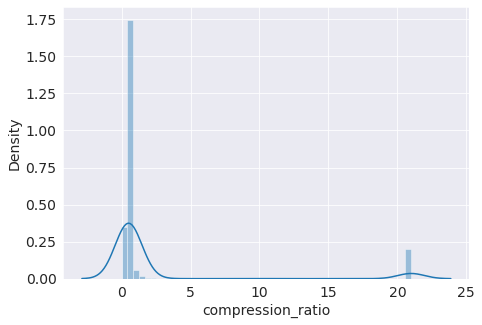

In [170]:
outlierPlot(finaldf['compression_ratio'])


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


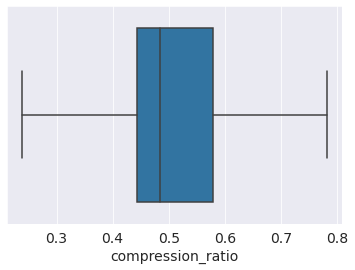

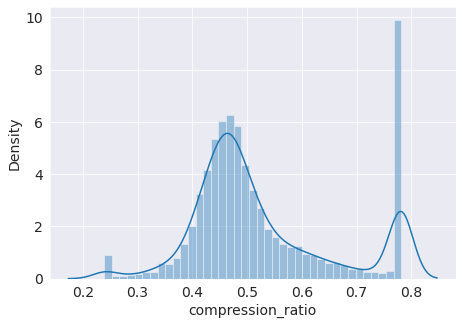

In [171]:
upper_limit,lower_limit = limits(finaldf['compression_ratio'])
finaldf['compression_ratio'] = capping(finaldf,upper_limit,lower_limit,'compression_ratio')
outlierPlot(finaldf['compression_ratio'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


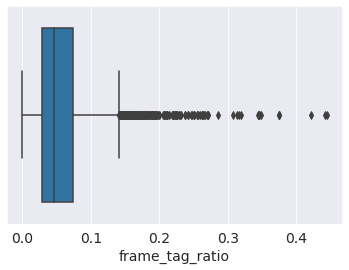

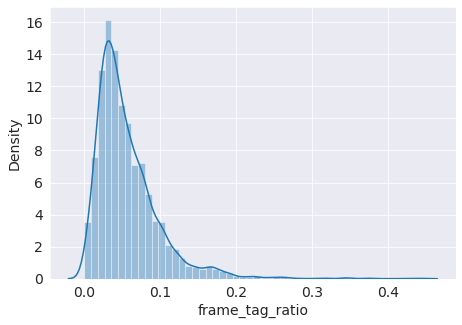

In [172]:
outlierPlot(finaldf['frame_tag_ratio'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


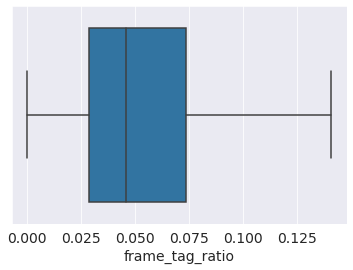

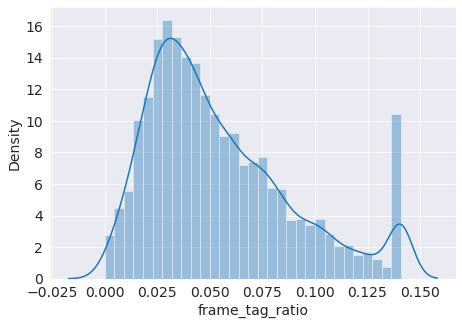

In [173]:
upper_limit,lower_limit = limits(finaldf['frame_tag_ratio'])
finaldf['frame_tag_ratio'] = capping(finaldf,upper_limit,lower_limit,'frame_tag_ratio')
outlierPlot(finaldf['frame_tag_ratio'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


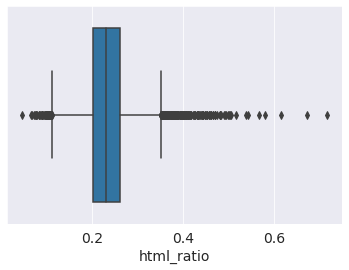

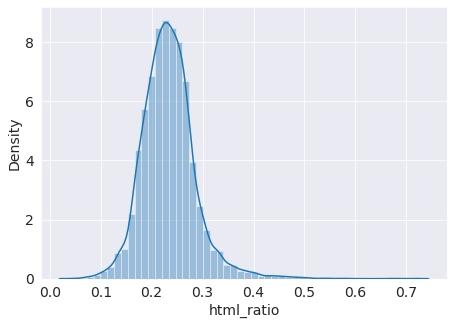

In [174]:
outlierPlot(finaldf['html_ratio'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


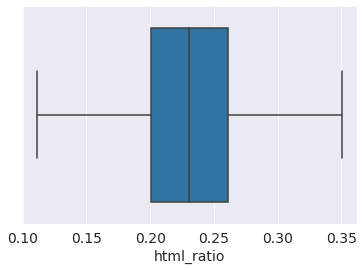

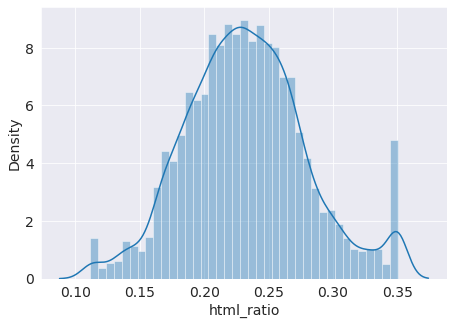

In [175]:
upper_limit,lower_limit = limits(finaldf['html_ratio'])
finaldf['html_ratio'] = capping(finaldf,upper_limit,lower_limit,'html_ratio')
outlierPlot(finaldf['html_ratio'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


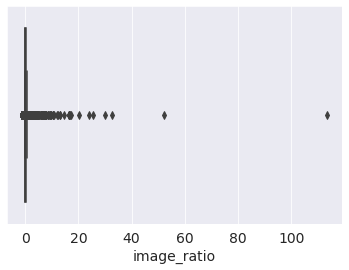

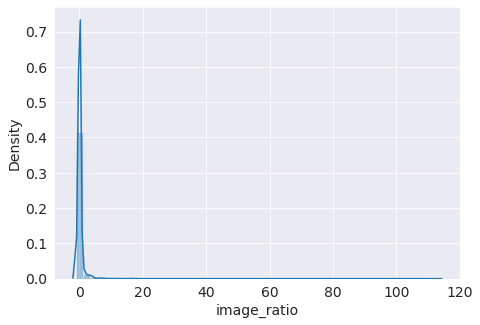

In [176]:
outlierPlot(finaldf['image_ratio'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


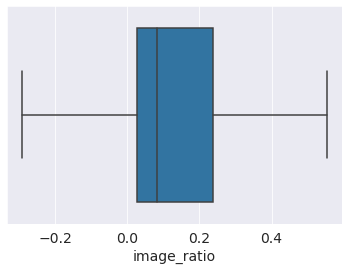

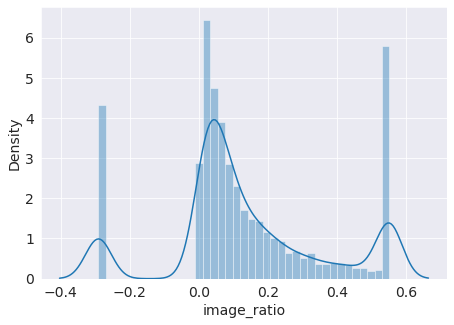

In [177]:
upper_limit,lower_limit = limits(finaldf['image_ratio'])
finaldf['image_ratio'] = capping(finaldf,upper_limit,lower_limit,'image_ratio')
outlierPlot(finaldf['image_ratio'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


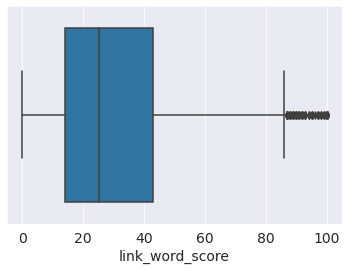

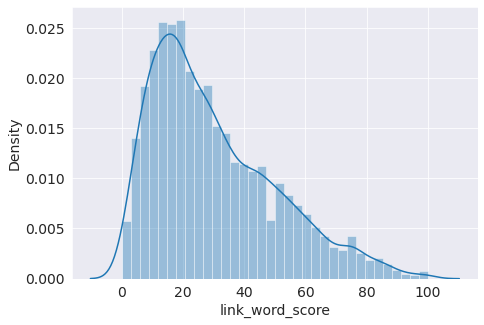

In [178]:
outlierPlot(finaldf['link_word_score'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


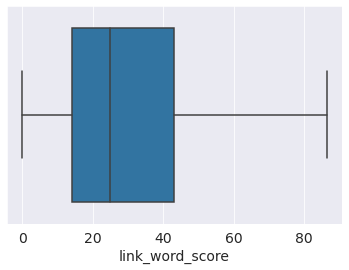

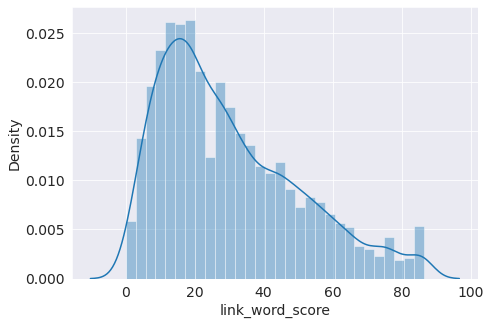

In [179]:
upper_limit,lower_limit = limits(finaldf['link_word_score'])
finaldf['link_word_score'] = capping(finaldf,upper_limit,lower_limit,'link_word_score')
outlierPlot(finaldf['link_word_score'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


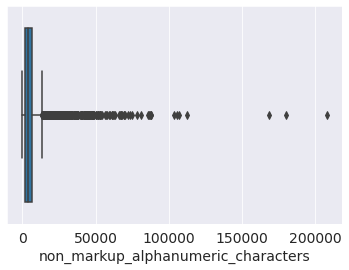

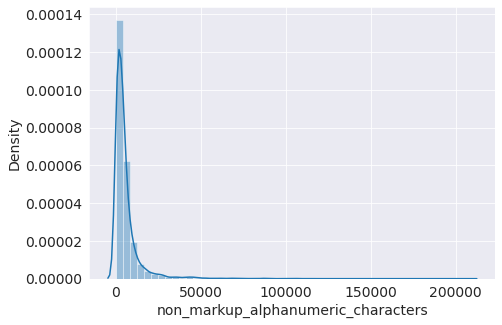

In [180]:
outlierPlot(finaldf['non_markup_alphanumeric_characters'])

In [181]:
df=finaldf

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   link                                7395 non-null   object 
 1   link_id                             7395 non-null   int64  
 2   page_description                    7395 non-null   object 
 3   alchemy_category                    5047 non-null   object 
 4   alchemy_category_score              5053 non-null   float64
 5   avg_link_size                       7395 non-null   float64
 6   common_word_link_ratio_1            7395 non-null   float64
 7   common_word_link_ratio_4            7395 non-null   float64
 8   compression_ratio                   7395 non-null   float64
 9   frame_tag_ratio                     7395 non-null   float64
 10  has_domain_link                     7395 non-null   int64  
 11  html_ratio                          7395 no

In [183]:
for i in df.columns:
    print(i)

link
link_id
page_description
alchemy_category
alchemy_category_score
avg_link_size
common_word_link_ratio_1
common_word_link_ratio_4
compression_ratio
frame_tag_ratio
has_domain_link
html_ratio
image_ratio
is_news
lengthy_link_domain
link_word_score
news_front_page
non_markup_alphanumeric_characters
count_of_links
number_of_words_in_url
parametrized_link_ratio
spelling_mistakes_ratio


In [184]:
vec=["avg_link_size",
"common_word_link_ratio_1",
"common_word_link_ratio_4",
"compression_ratio",
"frame_tag_ratio",
"has_domain_link",
"html_ratio",
"image_ratio",
"is_news",
"lengthy_link_domain",
"link_word_score",
"news_front_page",
"non_markup_alphanumeric_characters",
"count_of_links",
"number_of_words_in_url",
"parametrized_link_ratio",
"spelling_mistakes_ratio"]

Here we used Robust Scallar. This Scaler removes the median and scales the data according to the quantile range.


In [185]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
for feature in vec:
        scaler.fit(df[[feature]])
        df[feature] = scaler.transform(df[[feature]])

In [186]:
df.describe().T

count         mean          std  \
link_id                             7395.0  5305.704665  3048.384114   
alchemy_category_score              5053.0     0.603334     0.212864   
avg_link_size                       7395.0     0.085805     0.846056   
common_word_link_ratio_1            7395.0    -0.047970     0.735367   
common_word_link_ratio_4            7395.0     0.319489     0.789160   
compression_ratio                   7395.0     0.303308     0.958575   
frame_tag_ratio                     7395.0     0.192394     0.761468   
has_domain_link                     7395.0     0.021231     0.144162   
html_ratio                          7395.0     0.031428     0.789611   
image_ratio                         7395.0     0.258491     1.060416   
is_news                             4552.0     0.000000     0.000000   
lengthy_link_domain                 7395.0    -0.339689     0.473636   
link_word_score                     7395.0     0.172969     0.696864   
news_front_page                     6147.0     0.047828     0.213420   
non_markup_alphanumeric_characters  7395.0     0.461984     1.849819   
count_of_links                      7395.0     0.283961     1.281901   
number_of_words_in_url              7395.0    -0.009838     0.808278   
parametrized_link_ratio             7395.0     0.296842     0.914987   
spelling_mistakes_ratio             7395.0     0.272912     1.815703   

                                         min          25%          50%  \
link_id                             1.000000  2688.500000  5304.000000   
alchemy_category_score              0.070833     0.452424     0.625616   
avg_link_size                      -1.974135    -0.474135     0.000000   
common_word_link_ratio_1           -1.743019    -0.510841     0.000000   
common_word_link_ratio_4           -0.341540    -0.341540     0.000000   
compression_ratio                  -1.802802    -0.302802     0.000000   
frame_tag_ratio                    -1.018200    -0.384207     0.000000   
has_domain_link                     0.000000     0.000000     0.000000   
html_ratio                         -1.994120    -0.494120     0.000000   
image_ratio                        -1.771112    -0.271112     0.000000   
is_news                             0.000000     0.000000     0.000000   
lengthy_link_domain                -1.000000    -1.000000     0.000000   
link_word_score                    -0.862069    -0.379310     0.000000   
news_front_page                     0.000000     0.000000     0.000000   
non_markup_alphanumeric_characters -0.729471    -0.400375     0.000000   
count_of_links                     -0.985714    -0.407143     0.000000   
number_of_words_in_url             -1.250000    -0.500000     0.000000   
parametrized_link_ratio            -0.566119    -0.361523     0.000000   
spelling_mistakes_ratio            -2.046725    -0.471454     0.000000   

                                            75%           max  
link_id                             7946.500000  10566.000000  
alchemy_category_score                 0.780851      0.999426  
avg_link_size                          0.525865      2.025865  
common_word_link_ratio_1               0.489159      1.877098  
common_word_link_ratio_4               0.658460      2.158460  
compression_ratio                      0.697198      2.197198  
frame_tag_ratio                        0.615793      2.115793  
has_domain_link                        0.000000      1.000000  
html_ratio                             0.505880      2.005880  
image_ratio                            0.728888      2.228888  
is_news                                0.000000      0.000000  
lengthy_link_domain                    0.000000      0.000000  
link_word_score                        0.620690      2.120690  
news_front_page                        0.000000      1.000000  
non_markup_alphanumeric_characters     0.599625     42.611922  
count_of_links                         0.592857     34.700000  
number_of_words_in_url     

In [187]:
#graph here

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [188]:
sns.set_style("darkgrid")
plt.rcParams['font.size'] = 14
plt.rcParams['figure.facecolor'] = '#00000000'

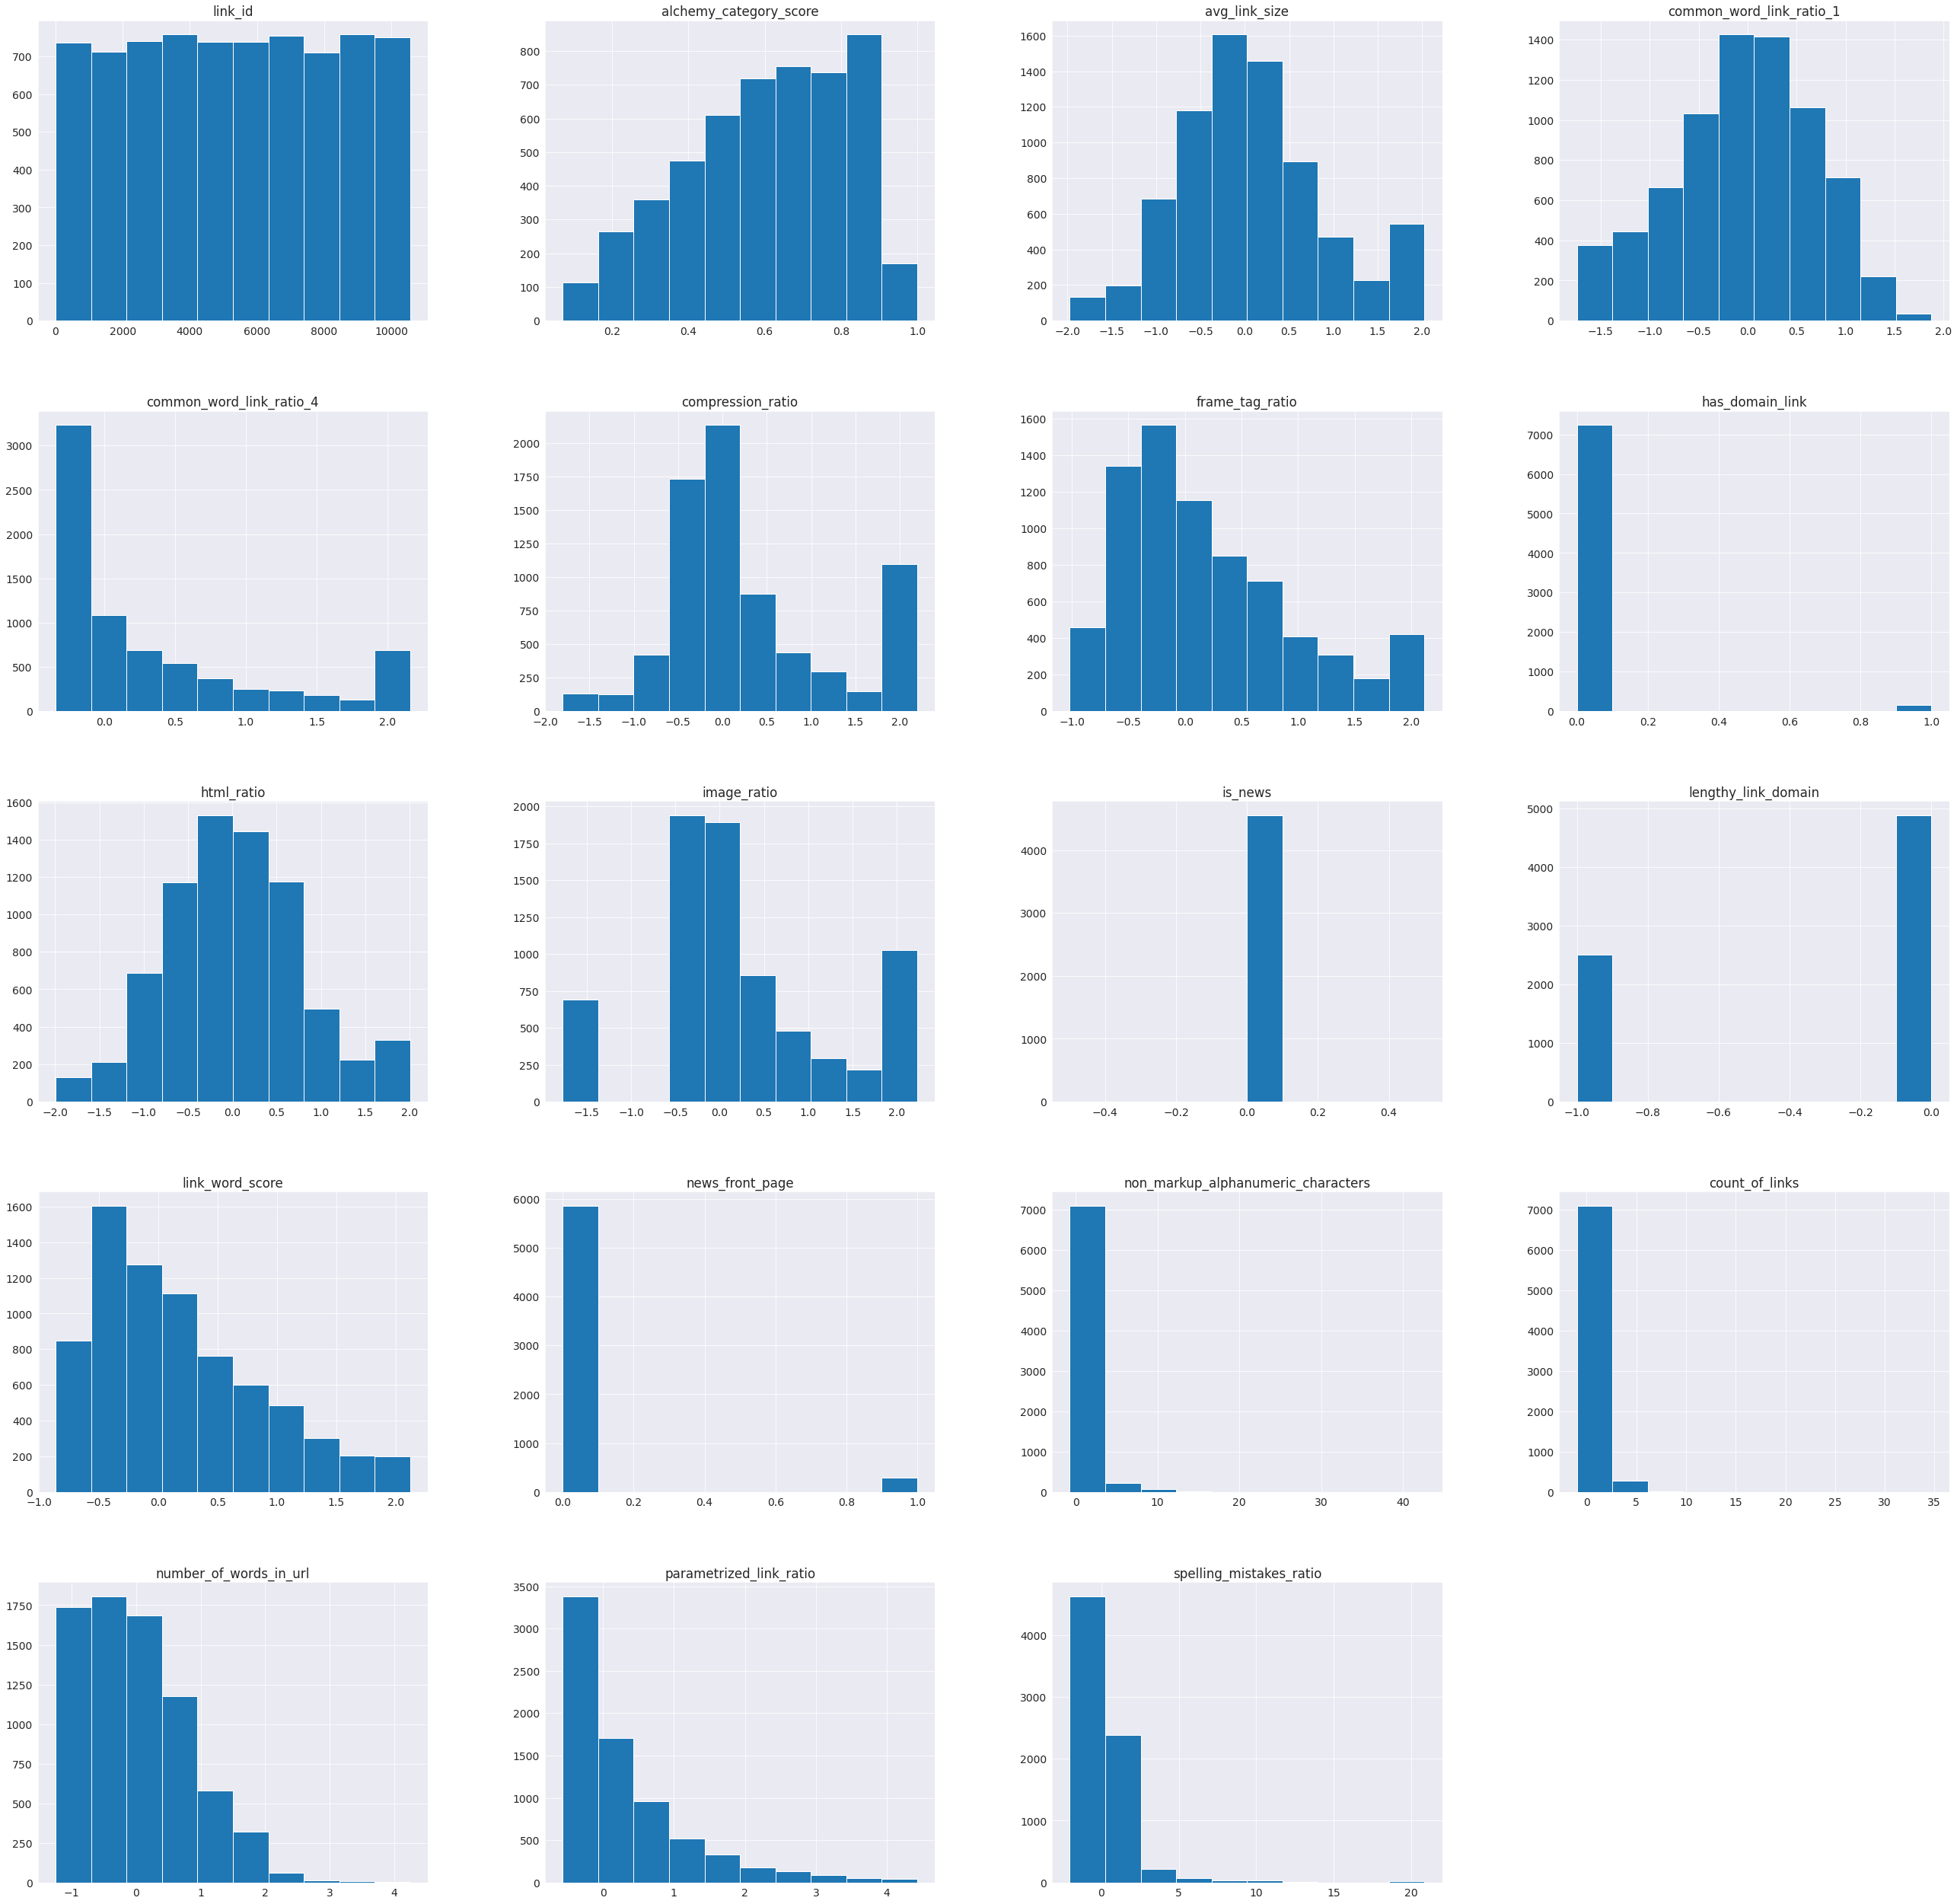

In [189]:
df.hist(figsize=(45,45));

In [190]:
df.isnull().any()

link                                  False
link_id                               False
page_description                      False
alchemy_category                       True
alchemy_category_score                 True
avg_link_size                         False
common_word_link_ratio_1              False
common_word_link_ratio_4              False
compression_ratio                     False
frame_tag_ratio                       False
has_domain_link                       False
html_ratio                            False
image_ratio                           False
is_news                                True
lengthy_link_domain                   False
link_word_score                       False
news_front_page                        True
non_markup_alphanumeric_characters    False
count_of_links                        False
number_of_words_in_url                False
parametrized_link_ratio               False
spelling_mistakes_ratio               False
dtype: bool

Exploring Alchemy_category and Score features..

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


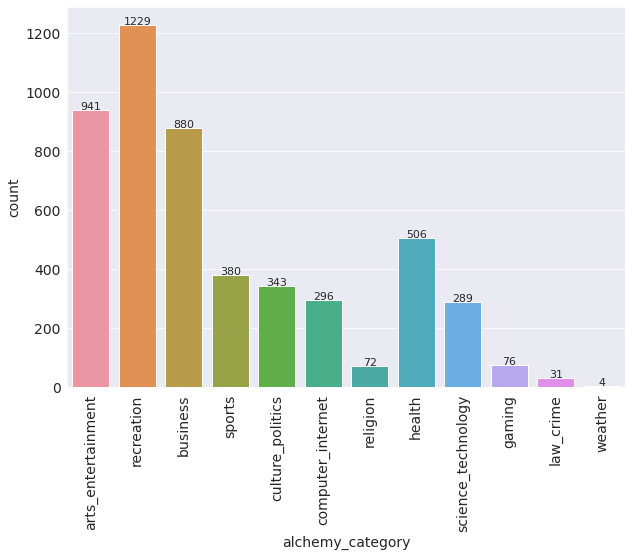

In [191]:
#no of datavalues for each alchemy catergory
countplt, ax = plt.subplots(figsize = (10,7))

ax.tick_params(axis='x', rotation=90)
sns.countplot(df.alchemy_category)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
countplt;

In [192]:
from wordcloud import WordCloud

This Function plots Word Cloud for each title

In [193]:
def create_wordcloud(words,title):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title, fontsize=13)
    plt.show()

In [194]:
df["alchemy_category"].value_counts()

recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
weather                  4
Name: alchemy_category, dtype: int64

In [195]:
list_labels=["recreation","arts_entertainment","business","health","sports","culture_politics","science_technology","computer_internet","religion","gaming","law_crime","weather"]
# list_labels=data["alchemy_category"].unique()
print(len(list_labels))

12


In [196]:
from nltk.corpus import stopwords
import nltk
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [197]:
import json
import re

In [198]:
df.shape

(7395, 22)

## JSON Encoding for page_description column

In [199]:
k=0
for i in range(df.shape[0]):
    stopword=["http",":","//",".","-","/","www"]
    t=""
    y=json.loads(df["page_description"][i])
    if("url" not in y.keys()):
#         a=re.split("/",df["link"][i])
        print(df["link"][i])
        if("title" in y.keys()):
            print(y["title"],k)
            k=k+1
print(k)

http://www.youtube.com/watch?v=TSTWqRkBN74
Will It Blend? - Extra Value Meal 0
http://www.freep.com/
Detroit Free Press Detroit news community entertainment yellow pages and classifieds Serving Detroit Michigan detroit free press 1
http://www.youtube.com/watch?v=cVKquLkK-b8
Talking Twin Babies, Translated! - RNGG 2
http://www.youtube.com/watch?v=88UU9Lg-ZcQ
Carolina Camera The Sling Shot Man 3
http://www.youtube.com/watch?v=MjuiazBz5Eo
No-Knead Pizza Dough Recipe - Easy No-Knead Pizza Dough 4
http://www.youtube.com/watch?v=MeWHmehAH28
The philosophy of liberty 5
http://www.youtube.com/watch?v=-_HjvjB4G5s
Blueberries faked in cereals, muffins, bagels and other food products - Food Investigations 6
http://www.youtube.com/watch?v=l2YgzCuKnv4
Southern Fried Chicken 7
http://www.youtube.com/watch?v=D0d2Ep_y_tY
Maybe - New Michael Jordan Commercial 8
http://www.youtube.com/watch?v=tVfYnm81ywo
Coca-Cola Chicken Wings Recipe / 可乐鸡翅 Cooking Chinese Food 9
http://www.youtube.com/watch?v=fJ0H0pP5

There are 59 rows with no url in page_description

In [200]:
df["collection"]=''

In [201]:
k=0
for i in range(df.shape[0]):
    t=""
    y=json.loads(df["page_description"][i])
    if("url" in y.keys()):
        t=t+y["url"]
    else:
        k=k+1
    if(y["body"]!=None):
        t=t+y["body"]
    elif("title" in y.keys()):
        if(y["title"]!=None):
            t=t+y["title"]
        else:
            df.drop(df.index[i],axis=0)
    
    df["collection"][i]=t
print("without url : ",k)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


without url :  60


In [202]:
df['collection'][0]

"cbc ca stevenandchris 2012 11 peggy ks sexy mood boosting cupcakes htmlIf you re ready to give your libido a boost with a sweet treat then you re going to want to try Peggy K s sexy mood boosting cupcakes Wet ingredients 1 tablespoon ground chia mixed with 1 4 cup water1 1 2 ripe banana2 tablespoons coconut oil½ cup walnut butter 2 teaspoon s vanilla extract1 cup almond milk ½ cup coconut sugar Dry ingredients 1 cup brown rice flour½ cup cooked quinoa 3 tablespoon maca powder1 3 cup cocoa powder1 teaspoon baking powder1 teaspoon non aluminum baking soda½ teaspoon saltchopped walnuts Raspberry frosting 1 cups Raw cashews1 4 cup maple syrup 1 cups raspberries Almond milk For the Cupcakes Preheat the oven to 350 F Place ground chia in a small bowl Add warm water and mix with a fork Set aside for gel to form Mash banana in large bowl then add oil nut butter vanilla and milk and stir to mix Add the rest of the ingredients and mix until well incorporated Grease rubber mini muffin tins with 

### trying word2vec for word embedding in 'page_description' column 

In [203]:
import nltk.data

In [204]:
from bs4 import BeautifulSoup

Function for text cleansing 

In [205]:
def prepro_page_desc (description, remove_stopwords=False, no_empty_lists=False):
    
    words = BeautifulSoup(description).get_text() 

    
    words = re.sub("[^a-zA-Z\d]", " ", words) 

    
    words = words.lower().split()                             
    
    if remove_stopwords:
        stops = set(stopwords.words("english"))                  
        words = [w for w in words if not w in stops]   
    
    return words  
    

In [206]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')


#### This function to split a description into parsed sentences

In [207]:

def description_to_sentences(description, tokenizer, remove_stopwords=False):
    
    raw_sentences = tokenizer.tokenize(description.strip())
    
    
    sentences = []
    for raw_sentence in raw_sentences:
        
        if len(raw_sentence) > 0:
            sentences.append(prepro_page_desc(raw_sentence, remove_stopwords))
    
    
    return sentences


In [208]:
sentences = []  
for desc in df['collection']:
   sentences += description_to_sentences(desc, tokenizer)

/opt/conda/lib/python3.7/site-packages/bs4/__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning
/opt/conda/lib/python3.7/site-packages/bs4/__init__.py:408: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning


In [209]:
sentences[0]

['cbc',
 'ca',
 'stevenandchris',
 '2012',
 '11',
 'peggy',
 'ks',
 'sexy',
 'mood',
 'boosting',
 'cupcakes',
 'htmlif',
 'you',
 're',
 'ready',
 'to',
 'give',
 'your',
 'libido',
 'a',
 'boost',
 'with',
 'a',
 'sweet',
 'treat',
 'then',
 'you',
 're',
 'going',
 'to',
 'want',
 'to',
 'try',
 'peggy',
 'k',
 's',
 'sexy',
 'mood',
 'boosting',
 'cupcakes',
 'wet',
 'ingredients',
 '1',
 'tablespoon',
 'ground',
 'chia',
 'mixed',
 'with',
 '1',
 '4',
 'cup',
 'water1',
 '1',
 '2',
 'ripe',
 'banana2',
 'tablespoons',
 'coconut',
 'oil',
 'cup',
 'walnut',
 'butter',
 '2',
 'teaspoon',
 's',
 'vanilla',
 'extract1',
 'cup',
 'almond',
 'milk',
 'cup',
 'coconut',
 'sugar',
 'dry',
 'ingredients',
 '1',
 'cup',
 'brown',
 'rice',
 'flour',
 'cup',
 'cooked',
 'quinoa',
 '3',
 'tablespoon',
 'maca',
 'powder1',
 '3',
 'cup',
 'cocoa',
 'powder1',
 'teaspoon',
 'baking',
 'powder1',
 'teaspoon',
 'non',
 'aluminum',
 'baking',
 'soda',
 'teaspoon',
 'saltchopped',
 'walnuts',
 'raspb

In [210]:
from gensim.models import Word2Vec, Phrases

In [211]:
# Set values for various parameters
num_features = 300                          
min_word_count = 1                           
num_workers = 4       
context = 10                                                                                              
downsampling = 1e-3   

w2v_model = Word2Vec(sentences, window=context, workers=num_workers,
                     vector_size=num_features,
                     min_count=min_word_count, sample=downsampling, sg=1)
model_name = "w2v"
w2v_model.save(model_name)


In [212]:
w2v_model = Word2Vec.load('w2v')

In [213]:
processed_data = df.copy(deep=True)
processed_data['tokenizedDescription'] = processed_data['collection'].apply(lambda x: prepro_page_desc(x, no_empty_lists=True))


/opt/conda/lib/python3.7/site-packages/bs4/__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


In [214]:
def makeFeatureVec(words, model, num_features):
    
    featureVec = np.zeros((num_features,),dtype="float32")
    
    
    nwords = 0.

    
    index2word_set = set(model.wv.index_to_key)

    if len(words) == 0:
        words = ['unknown']
    
    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec, model.wv[word])
    
    
    featureVec = np.divide(featureVec, nwords)
    
    return featureVec


def getAvgFeatureVecs(descriptions, model, num_features):
    descriptionFeatureVecs = np.zeros((len(descriptions),num_features),dtype="float32")
    
    for i, description in enumerate(descriptions):
         
        descriptionFeatureVecs[i] = makeFeatureVec(description, model, num_features)
        
    return descriptionFeatureVecs

In [215]:
vectorized_data = pd.DataFrame(getAvgFeatureVecs(processed_data['tokenizedDescription'], w2v_model, num_features=300))


In [216]:
vectorized_data.shape

(7395, 300)

In [217]:
df3=vectorized_data

In [218]:
df=pd.concat([df, df3], axis=1)

In [219]:
df.shape

(7395, 323)

### this is the vectorized column we have created via word2vec
### since alchemy category and score prediction was dependent on tfifdf vectors, we used these vector instead

## stopwords removal,tokenizing and use of regular expression for text purification

### We applied TFIDF and later applied Word2Vec and found better results using the later.
### Therefore, the tfidf implimetation is commented below.

In [220]:
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem.porter import PorterStemmer
# from nltk.stem import WordNetLemmatizer
# ps=PorterStemmer()
# wordnet=WordNetLemmatizer()

In [221]:
# for i in range(df.shape[0]):
#     text = re.sub(r'\[[0-9]*\]',' ',df["collection"][i])
#     text = re.sub(r'\s+',' ',text)
#     text = text.lower()
#     text = re.sub(r'\d',' ',text)
#     text = re.sub(r'\s+',' ',text)
#     text = text.lower().replace('\n',' ').replace('\r','').strip()
#     text = re.sub(' +', ' ', text)
#     text = re.sub(r'[^\w\s]','',text)
    
    
#     stop_words = set(stopwords.words('english')) 
#     word_tokens = word_tokenize(text) 
# #     filtered_sentence = [ps.stem(w) for w in word_tokens if not w in stop_words]
#     filtered_sentence = [wordnet.lemmatize(w) for w in word_tokens if not w in stop_words]
# #     filtered_sentence = [] 
# #     for w in word_tokens: 
# #         if w not in stop_words: 
# #             filtered_sentence.append(w) 
    
#     text = " ".join(filtered_sentence)
    
    
#     df["collection"][i]=text

In [222]:
k=0
for i in range(df.shape[0]):
    y=json.loads(df["page_description"][i])
    if("title" not in y.keys()):
        k=k+1
print(k)

1


### plotting word cloud for various alchemy category

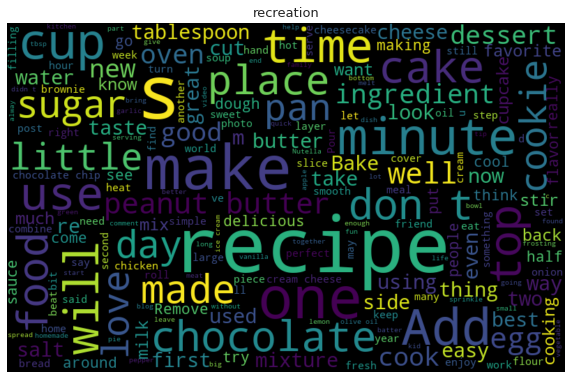

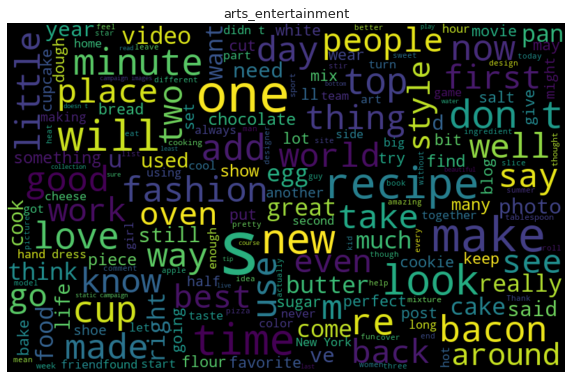

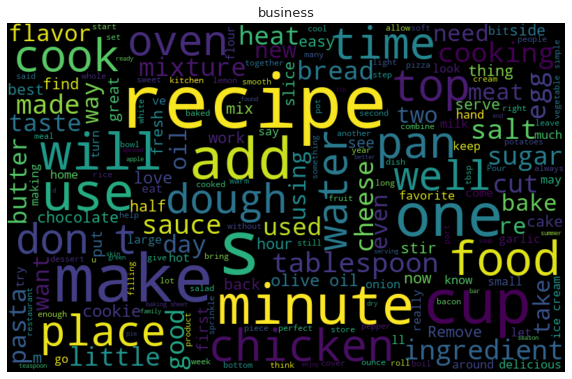

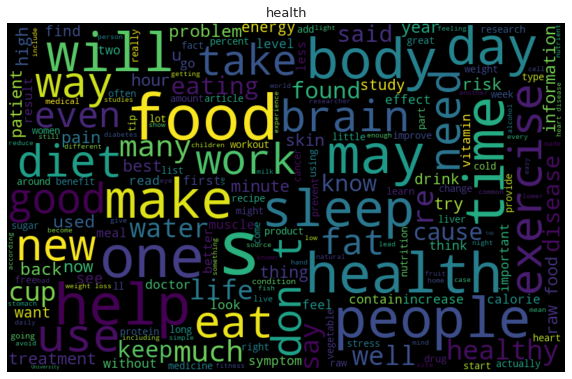

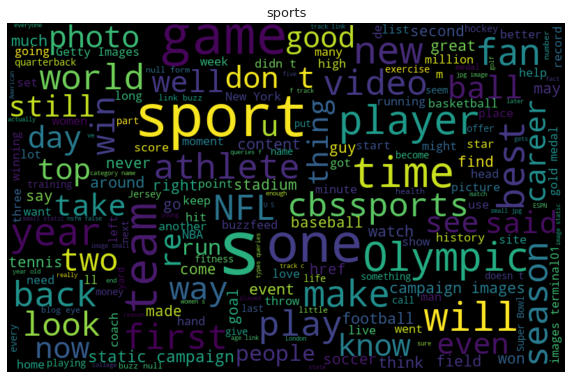

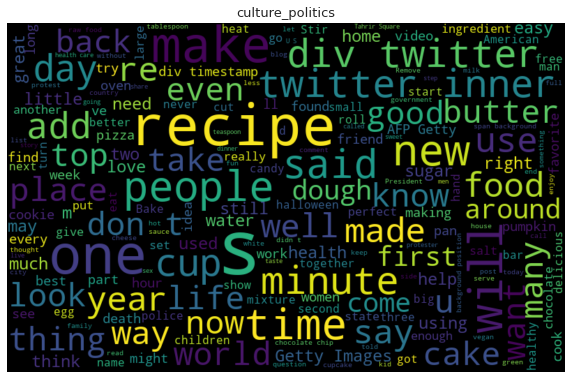

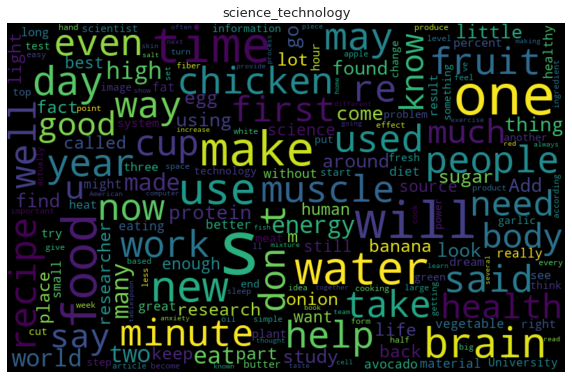

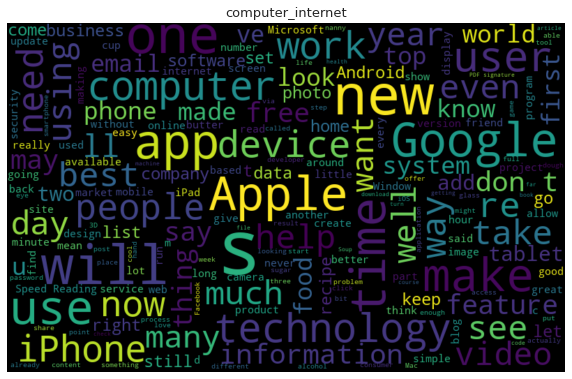

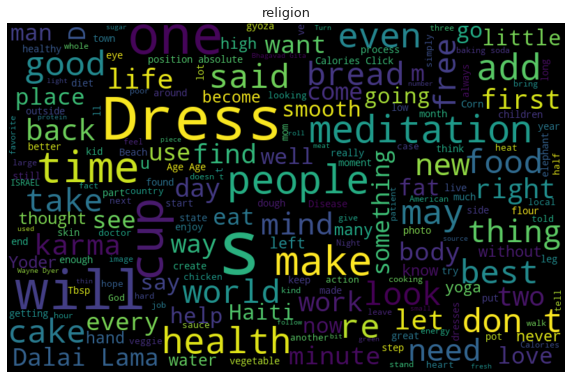

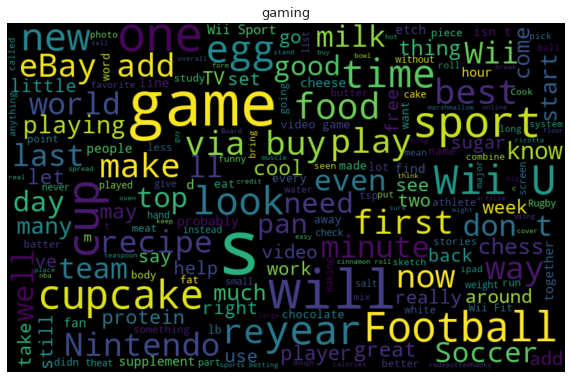

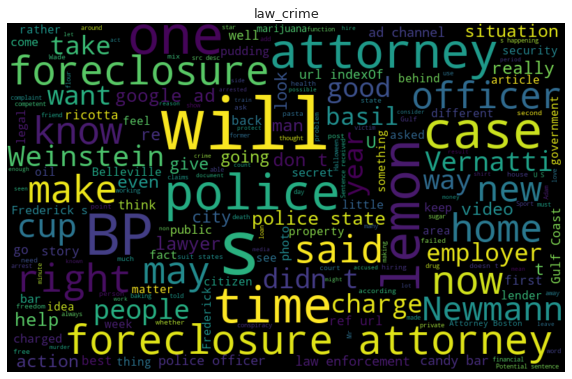

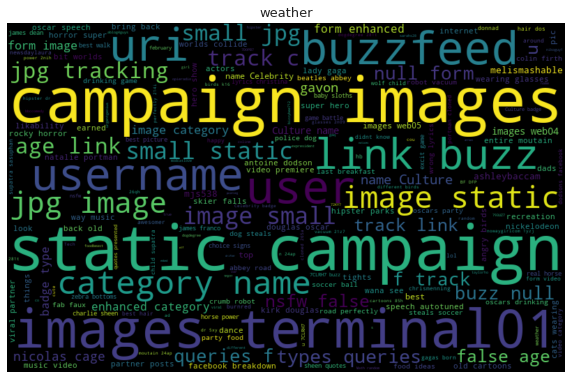

In [223]:
for i in range (0,len(list_labels)):
    subset=df[df.alchemy_category==list_labels[i]]
    '''[word for word in sentences[i] if word not in stopwords.words('english')]'''
    text=[word for word in subset.collection.values if word not in stopwords.words('english')]
    words =" ".join(text)
    create_wordcloud(words,list_labels[i])

In [224]:
df["alchemy_category"].unique()

array(['arts_entertainment', 'recreation', 'business', 'sports', nan,
       'culture_politics', 'computer_internet', 'religion', 'health',
       'science_technology', 'gaming', 'law_crime', 'weather'],
      dtype=object)

## creating vectors via tfidf

In [225]:
# from sklearn.feature_extraction.text import TfidfVectorizer

In [226]:
# X_train=df["collection"]
# df["vec"]="";

In [227]:
# ngram_range = (1,2)
# min_df = 10
# max_df = 1.
# max_features = None

### Parameterizing TFIDF for optimal results

In [228]:
# tfidf = TfidfVectorizer(encoding='utf-8',
#                         ngram_range=ngram_range,
#                         stop_words=None,
#                         lowercase=False,
#                         max_df=max_df,
#                         min_df=min_df,
#                         max_features=max_features,
#                         norm='l2',
#                         sublinear_tf=True)
                        
# features_train = tfidf.fit_transform(X_train).toarray()
# print(features_train)
# feature_name=tfidf.get_feature_names()
# print(feature_name)

In [229]:
# len(feature_name)

In [230]:
# df3=pd.DataFrame(features_train)

In [231]:
# df=pd.concat([df, df3], axis=1)

In [232]:
df.shape

(7395, 323)

In [233]:
for i in df.columns:
    print(i)

link
link_id
page_description
alchemy_category
alchemy_category_score
avg_link_size
common_word_link_ratio_1
common_word_link_ratio_4
compression_ratio
frame_tag_ratio
has_domain_link
html_ratio
image_ratio
is_news
lengthy_link_domain
link_word_score
news_front_page
non_markup_alphanumeric_characters
count_of_links
number_of_words_in_url
parametrized_link_ratio
spelling_mistakes_ratio
collection
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177

In [234]:
df.describe()

link_id  alchemy_category_score  avg_link_size  \
count   7395.000000             5053.000000    7395.000000   
mean    5305.704665                0.603334       0.085805   
std     3048.384114                0.212864       0.846056   
min        1.000000                0.070833      -1.974135   
25%     2688.500000                0.452424      -0.474135   
50%     5304.000000                0.625616       0.000000   
75%     7946.500000                0.780851       0.525865   
max    10566.000000                0.999426       2.025865   

       common_word_link_ratio_1  common_word_link_ratio_4  compression_ratio  \
count               7395.000000               7395.000000        7395.000000   
mean                  -0.047970                  0.319489           0.303308   
std                    0.735367                  0.789160           0.958575   
min                   -1.743019                 -0.341540          -1.802802   
25%                   -0.510841                 -0.341540          -0.302802   
50%                    0.000000                  0.000000           0.000000   
75%                    0.489159                  0.658460           0.697198   
max                    1.877098                  2.158460           2.197198   

       frame_tag_ratio  has_domain_link   html_ratio  image_ratio  ...  \
count      7395.000000      7395.000000  7395.000000  7395.000000  ...   
mean          0.192394         0.021231     0.031428     0.258491  ...   
std           0.761468         0.144162     0.789611     1.060416  ...   
min          -1.018200         0.000000    -1.994120    -1.771112  ...   
25%          -0.384207         0.000000    -0.494120    -0.271112  ...   
50%           0.000000         0.000000     0.000000     0.000000  ...   
75%           0.615793         0.000000     0.505880     0.728888  ...   
max           2.115793         1.000000     2.005880     2.228888  ...   

               290          291          292          293          294  \
count  7395.000000  7395.000000  7395.000000  7395.000000  7395.000000   
mean     -0.057009     0.178738     0.007107     0.074008     0.094893   
std       0.049013     0.051647     0.059223     0.057483     0.058622   
min      -0.320468    -0.129245    -0.333431    -0.232790    -0.171500   
25%      -0.088350     0.158184    -0.030715     0.035200     0.053773   
50%      -0.064979     0.179028     0.000309     0.081166     0.088890   
75%      -0.034409     0.201971     0.038887     0.112376     0.127787   
max       0.315250     0.485464     0.373385     0.416017     0.465397   

               295          296          297          298          299  
count  7395.000000  7395.000000  7395.000000  7395.000000  7395.000000  
mean      0.134071     0.033403    -0.023179     0.032278    -0.111693  
std       0.049388     0.050843     0.049716     0.059615     0.051464  
min      -0.146197    -0.240957    -0.417845    -0.277263    -0.500377  
25%       0.110259     0.014725    -0.048884    -0.002603    -0.137745  
50%       0.136410     0.040145    -0.022710     0.028360    -0.110737  
75%       0.159764     0.061856     0.002899     0.067966    -0.080629  
max       0.416739     0.272403     0.224855     0.321717     0.187428  

[8 rows x 319 columns]

### droping link , linkid, page description as the information the give is being sustain in vectors of tfidf that was made from page description
### dropping is_news and news_front as they contain only single boolean value or null

In [235]:
# column=["link","link_id","page_description","vec","collection","news_front_page","is_news"]
column=["link","link_id","page_description","collection","news_front_page","is_news"]

df.drop(column,axis=1,inplace=True)

In [236]:
p=df.dropna(axis=0)

### model for prediction of null values in alchemy category and alchmey scores

In [237]:
preprocessing_train=p.iloc[:,17:]
preprocessing_test=p.iloc[:,0:1]

In [238]:
preprocessing_train

0         1         2         3         4         5         6    \
0    -0.068508  0.148376  0.128258  0.118385 -0.165992 -0.338777  0.145037   
1    -0.017838  0.149078  0.187062  0.170628 -0.093950 -0.366698  0.126942   
2    -0.028942  0.163552  0.138368  0.180540 -0.091550 -0.234489  0.046797   
3    -0.066669  0.229343  0.208808  0.228460 -0.059012 -0.288841  0.097990   
4    -0.026426  0.210528  0.094497  0.131334 -0.052167 -0.292249  0.101627   
...        ...       ...       ...       ...       ...       ...       ...   
7384 -0.050816  0.195688  0.043598  0.138692  0.001136 -0.262186  0.047521   
7385 -0.036273  0.158852  0.126808  0.152189 -0.163522 -0.297087  0.141951   
7387 -0.052628  0.167797  0.101629  0.135696 -0.140195 -0.316152  0.141002   
7391 -0.033996  0.186613  0.106214  0.192878 -0.084731 -0.142452  0.025540   
7394  0.023547  0.196497  0.143480  0.262296  0.024761 -0.271987  0.112844   

           7         8         9    ...       290       291       292  \
0     0.589548  0.058347 -0.171691  ...  0.004113  0.145074 -0.041780   
1     0.456239 -0.061668 -0.229674  ... -0.052050  0.204480 -0.041934   
2     0.524915 -0.046492 -0.114500  ... -0.058764  0.198158  0.060601   
3     0.522283 -0.192556 -0.224315  ... -0.108083  0.204316  0.142350   
4     0.577637 -0.072080 -0.247477  ... -0.060878  0.188786  0.083276   
...        ...       ...       ...  ...       ...       ...       ...   
7384  0.438514 -0.068767 -0.193096  ... -0.117421  0.217872 -0.049910   
7385  0.539328  0.009342 -0.190971  ... -0.008234  0.204119 -0.011100   
7387  0.541762  0.001254 -0.169360  ... -0.039594  0.161410 -0.056990   
7391  0.472347  0.002309 -0.199224  ... -0.084649  0.168040  0.035597   
7394  0.568172 -0.119370 -0.135421  ... -0.135889  0.178144  0.019005   

           293       294       295       296       297       298       299  
0    -0.030198  0.039211  0.128743  0.041091  0.013306  0.113329 -0.040956  
1     0.146950  0.063490  0.166623  0.012334 -0.055824  0.033687 -0.114763  
2     0.087744  0.154501  0.100439  0.115883 -0.046396 -0.038946 -0.089962  
3     0.165643  0.089919  0.116795 -0.105810 -0.062975  0.080793 -0.145105  
4     0.133646  0.150263  0.150143 -0.001589 -0.065592 -0.047429 -0.048416  
...        ...       ...       ...       ...       ...       ...       ...  
7384  0.129174  0.086629  0.146333  0.076475 -0.024870 -0.031926 -0.178573  
7385  0.023659  0.054428  0.135180  0.022865  0.012615  0.082885 -0.062717  
7387  0.045712  0.045753  0.141395  0.046879 -0.001938  0.099169 -0.091551  
7391  0.120785  0.136354  0.143215  0.090110 -0.021496  0.023295 -0.089276  
7394  0.222755  0.105588  0.136817  0.012187 -0.142159 -0.122116 -0.154148  

[5047 rows x 300 columns]

In [239]:
preprocessing_test

alchemy_category
0     arts_entertainment
1             recreation
2               business
3     arts_entertainment
4                 sports
...                  ...
7384  arts_entertainment
7385          recreation
7387  arts_entertainment
7391              health
7394            business

[5047 rows x 1 columns]

In [240]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
preprocessing_test['alchemy_category']= label_encoder.fit_transform(preprocessing_test['alchemy_category'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [241]:
x=preprocessing_test.index

### Here we used decision tree model for multi-class classifcation

In [242]:
from sklearn.tree import DecisionTreeClassifier
clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
clf_pruned.fit(preprocessing_train, preprocessing_test)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [243]:
df.iloc[:,17:]

0         1         2         3         4         5         6    \
0    -0.068508  0.148376  0.128258  0.118385 -0.165992 -0.338777  0.145037   
1    -0.017838  0.149078  0.187062  0.170628 -0.093950 -0.366698  0.126942   
2    -0.028942  0.163552  0.138368  0.180540 -0.091550 -0.234489  0.046797   
3    -0.066669  0.229343  0.208808  0.228460 -0.059012 -0.288841  0.097990   
4    -0.026426  0.210528  0.094497  0.131334 -0.052167 -0.292249  0.101627   
...        ...       ...       ...       ...       ...       ...       ...   
7390  0.017042  0.170433  0.107001  0.185401 -0.114041 -0.273779  0.072669   
7391 -0.033996  0.186613  0.106214  0.192878 -0.084731 -0.142452  0.025540   
7392 -0.025067  0.173424  0.134872  0.141732 -0.156548 -0.325155  0.052547   
7393 -0.015723  0.170996  0.080832  0.169244 -0.127769 -0.199208  0.077124   
7394  0.023547  0.196497  0.143480  0.262296  0.024761 -0.271987  0.112844   

           7         8         9    ...       290       291       292  \
0     0.589548  0.058347 -0.171691  ...  0.004113  0.145074 -0.041780   
1     0.456239 -0.061668 -0.229674  ... -0.052050  0.204480 -0.041934   
2     0.524915 -0.046492 -0.114500  ... -0.058764  0.198158  0.060601   
3     0.522283 -0.192556 -0.224315  ... -0.108083  0.204316  0.142350   
4     0.577637 -0.072080 -0.247477  ... -0.060878  0.188786  0.083276   
...        ...       ...       ...  ...       ...       ...       ...   
7390  0.490160 -0.066969 -0.206896  ... -0.100483  0.179835 -0.031449   
7391  0.472347  0.002309 -0.199224  ... -0.084649  0.168040  0.035597   
7392  0.471125 -0.015888 -0.129037  ... -0.109475  0.192281  0.023137   
7393  0.459254 -0.024720 -0.229165  ... -0.102745  0.145251  0.033905   
7394  0.568172 -0.119370 -0.135421  ... -0.135889  0.178144  0.019005   

           293       294       295       296       297       298       299  
0    -0.030198  0.039211  0.128743  0.041091  0.013306  0.113329 -0.040956  
1     0.146950  0.063490  0.166623  0.012334 -0.055824  0.033687 -0.114763  
2     0.087744  0.154501  0.100439  0.115883 -0.046396 -0.038946 -0.089962  
3     0.165643  0.089919  0.116795 -0.105810 -0.062975  0.080793 -0.145105  
4     0.133646  0.150263  0.150143 -0.001589 -0.065592 -0.047429 -0.048416  
...        ...       ...       ...       ...       ...       ...       ...  
7390  0.115255  0.077057  0.177076  0.054864 -0.037405  0.023767 -0.116762  
7391  0.120785  0.136354  0.143215  0.090110 -0.021496  0.023295 -0.089276  
7392  0.091604  0.151663  0.097746  0.103536 -0.047022  0.010346 -0.147175  
7393  0.105589  0.139082  0.121998  0.072219 -0.033685  0.021232 -0.086150  
7394  0.222755  0.105588  0.136817  0.012187 -0.142159 -0.122116 -0.154148  

[7395 rows x 300 columns]

In [244]:
y_pred=clf_pruned.predict(df.iloc[:,17:])
tr=clf_pruned.predict_proba(df.iloc[:,17:])

In [245]:
nr,nc=df.shape
nr

7395

In [246]:
tr.shape

(7395, 12)

In [247]:
tempdf = pd.DataFrame(data = y_pred,columns = ["alchemy_category"])

In [248]:
df["alchemy_category"]

0       arts_entertainment
1               recreation
2                 business
3       arts_entertainment
4                   sports
               ...        
7390                   NaN
7391                health
7392                   NaN
7393                   NaN
7394              business
Name: alchemy_category, Length: 7395, dtype: object

### we have predicted the category from the entirety of the data set and  replaced just those values which were nell in orignal dataset

In [249]:
k=0
for i in range(nr):
    if df["alchemy_category"][i]  is np.nan:
        df["alchemy_category"][i]=tempdf["alchemy_category"][i]
    else:
        df["alchemy_category"][i]=preprocessing_test["alchemy_category"][i]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [250]:
data2["alchemy_category_score"]

0       0.365831
1       0.876315
2            NaN
3            NaN
4       0.747449
          ...   
2953         NaN
2954    0.605566
2955         NaN
2956         NaN
2957    0.196317
Name: alchemy_category_score, Length: 2958, dtype: float64

In [251]:
df["alchemy_category"].unique()

array([0, 7, 1, 10, 2, 3, 8, 5, 9, 4, 6, 11], dtype=object)

In [252]:
df.head()

alchemy_category  alchemy_category_score  avg_link_size  \
0                0                0.471752      -0.353974   
1                7                0.885088      -1.210372   
2                1                0.716379       0.512097   
3                0                0.562999      -0.637758   
4               10                0.893246      -0.299303   

   common_word_link_ratio_1  common_word_link_ratio_4  compression_ratio  \
0                 -0.043781                 -0.184711          -0.036789   
1                 -1.255090                 -0.341540          -0.181555   
2                  0.235978                  1.502778           0.491369   
3                 -0.404330                 -0.341540           1.416883   
4                  0.178222                 -0.039441           2.197198   

   frame_tag_ratio  has_domain_link  html_ratio  image_ratio  ...       290  \
0         1.748436              0.0    0.626181    -0.042584  ...  0.004113   
1         0.368882              0.0   -0.321803     0.689818  ... -0.052050   
2         0.367224              0.0    1.399899     0.023717  ... -0.058764   
3        -0.067866              0.0    0.402568     2.228888  ... -0.108083   
4        -0.692393              0.0   -0.539262     2.228888  ... -0.060878   

        291       292       293       294       295       296       297  \
0  0.145074 -0.041780 -0.030198  0.039211  0.128743  0.041091  0.013306   
1  0.204480 -0.041934  0.146950  0.063490  0.166623  0.012334 -0.055824   
2  0.198158  0.060601  0.087744  0.154501  0.100439  0.115883 -0.046396   
3  0.204316  0.142350  0.165643  0.089919  0.116795 -0.105810 -0.062975   
4  0.188786  0.083276  0.133646  0.150263  0.150143 -0.001589 -0.065592   

        298       299  
0  0.113329 -0.040956  
1  0.033687 -0.114763  
2 -0.038946 -0.089962  
3  0.080793 -0.145105  
4 -0.047429 -0.048416  

[5 rows x 317 columns]

## we were first predicting alchemy category score using Linear Regression, but accuracy was not optimal and thus we decided to replace null with category-wise mean of each null entry wrt to its category.

In [253]:
# d_X_train=df.dropna(axis=0)
# d_Y_train=d_X_train
# d_X_train=d_X_train.iloc[:,np.r_[0,20:21741]]
# d_Y_train=d_Y_train.iloc[:,1:2]
# from sklearn import linear_model
# regr = linear_model.LinearRegression()
# regr.fit(d_X_train, d_Y_train)

In [254]:
# y_score_pred=regr.predict(df.iloc[:,np.r_[0,20:21741]])

In [255]:
# y_score_pred

In [256]:
# tempdf123 = pd.DataFrame(data = y_score_pred,columns = ["alchemy_category_score"])

In [257]:
# tempdf123["alchemy_category_score"][7390]

In [258]:
nr

7395

In [259]:
# for i in range(nr):
#     if df["alchemy_category_score"][i]  is np.NaN:
#         df["alchemy_category_score"][i]=tempdf123["alchemy_category_score"][i]
#     else:
#         df["alchemy_category_score"][i]=df["alchemy_category_score"][i]

In [260]:
x=df.groupby('alchemy_category')['alchemy_category_score'].mean()

In [261]:
x

alchemy_category
0     0.635313
1     0.610034
2     0.699808
3     0.577337
4     0.505969
5     0.705927
6     0.499999
7     0.527689
8     0.426596
9     0.549531
10    0.666918
11    0.596973
Name: alchemy_category_score, dtype: float64

In [262]:
k=0
for i in range(nr):
    if pd.isna(df["alchemy_category_score"][i]):
        df["alchemy_category_score"][i]=x[df["alchemy_category"][i]]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [263]:
df["alchemy_category_score"]

0       0.471752
1       0.885088
2       0.716379
3       0.562999
4       0.893246
          ...   
7390    0.699808
7391    0.605566
7392    0.635313
7393    0.705927
7394    0.196317
Name: alchemy_category_score, Length: 7395, dtype: float64

In [264]:
type(df["alchemy_category_score"][7393])

numpy.float64

In [265]:
type(df["alchemy_category"][67])

numpy.int64

In [266]:
df["alchemy_category_score"]

0       0.471752
1       0.885088
2       0.716379
3       0.562999
4       0.893246
          ...   
7390    0.699808
7391    0.605566
7392    0.635313
7393    0.705927
7394    0.196317
Name: alchemy_category_score, Length: 7395, dtype: float64

In [267]:
print(data.shape)
df.head()

(4437, 27)


alchemy_category  alchemy_category_score  avg_link_size  \
0                0                0.471752      -0.353974   
1                7                0.885088      -1.210372   
2                1                0.716379       0.512097   
3                0                0.562999      -0.637758   
4               10                0.893246      -0.299303   

   common_word_link_ratio_1  common_word_link_ratio_4  compression_ratio  \
0                 -0.043781                 -0.184711          -0.036789   
1                 -1.255090                 -0.341540          -0.181555   
2                  0.235978                  1.502778           0.491369   
3                 -0.404330                 -0.341540           1.416883   
4                  0.178222                 -0.039441           2.197198   

   frame_tag_ratio  has_domain_link  html_ratio  image_ratio  ...       290  \
0         1.748436              0.0    0.626181    -0.042584  ...  0.004113   
1         0.368882              0.0   -0.321803     0.689818  ... -0.052050   
2         0.367224              0.0    1.399899     0.023717  ... -0.058764   
3        -0.067866              0.0    0.402568     2.228888  ... -0.108083   
4        -0.692393              0.0   -0.539262     2.228888  ... -0.060878   

        291       292       293       294       295       296       297  \
0  0.145074 -0.041780 -0.030198  0.039211  0.128743  0.041091  0.013306   
1  0.204480 -0.041934  0.146950  0.063490  0.166623  0.012334 -0.055824   
2  0.198158  0.060601  0.087744  0.154501  0.100439  0.115883 -0.046396   
3  0.204316  0.142350  0.165643  0.089919  0.116795 -0.105810 -0.062975   
4  0.188786  0.083276  0.133646  0.150263  0.150143 -0.001589 -0.065592   

        298       299  
0  0.113329 -0.040956  
1  0.033687 -0.114763  
2 -0.038946 -0.089962  
3  0.080793 -0.145105  
4 -0.047429 -0.048416  

[5 rows x 317 columns]

### Till now alchemy_category was label encoded , but now we have connverted it to one hot encoding.

In [268]:
v=["alchemy_category"]
df=pd.get_dummies(df,columns=v)

## At this point we have the data fully preprocessed with no na values and categorical data.

In [269]:
df["alchemy_category_11"]

0       0
1       0
2       0
3       0
4       0
       ..
7390    0
7391    0
7392    0
7393    0
7394    0
Name: alchemy_category_11, Length: 7395, dtype: uint8

In [270]:
finaltrain=df.iloc[:4437,:];

### df is split into orignal train and test dataset

In [271]:
finaltrain["label"]=data["label"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [272]:
finaltrain.head()

alchemy_category_score  avg_link_size  common_word_link_ratio_1  \
0                0.471752      -0.353974                 -0.043781   
1                0.885088      -1.210372                 -1.255090   
2                0.716379       0.512097                  0.235978   
3                0.562999      -0.637758                 -0.404330   
4                0.893246      -0.299303                  0.178222   

   common_word_link_ratio_4  compression_ratio  frame_tag_ratio  \
0                 -0.184711          -0.036789         1.748436   
1                 -0.341540          -0.181555         0.368882   
2                  1.502778           0.491369         0.367224   
3                 -0.341540           1.416883        -0.067866   
4                 -0.039441           2.197198        -0.692393   

   has_domain_link  html_ratio  image_ratio  lengthy_link_domain  ...  \
0              0.0    0.626181    -0.042584                 -1.0  ...   
1              0.0   -0.321803     0.689818                  0.0  ...   
2              0.0    1.399899     0.023717                  0.0  ...   
3              0.0    0.402568     2.228888                 -1.0  ...   
4              0.0   -0.539262     2.228888                  0.0  ...   

   alchemy_category_3  alchemy_category_4  alchemy_category_5  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   alchemy_category_6  alchemy_category_7  alchemy_category_8  \
0                   0                   0                   0   
1                   0                   1                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   alchemy_category_9  alchemy_category_10  alchemy_category_11  label  
0                   0                    0                    0      1  
1                   0                    0                    0      1  
2                   0                    0                    0      0  
3                   0                    0                    0      0  
4                   0                    1                    0      0  

[5 rows x 329 columns]

### At this stage we have finaltrain fully ready for model training

### applying models and making predictions

In [273]:
from sklearn.model_selection import train_test_split
TX=finaltrain.drop('label',axis=1)
Ty=finaltrain["label"]
TX_train, TX_test, Ty_train, Ty_test = train_test_split(TX, Ty, test_size=0.33, random_state=0)

#### random forest and its hyperparameter tuning

In [274]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(random_state=1)
model.fit(TX_train, Ty_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomForestClassifier(random_state=1)

In [275]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in range(200,2000,200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [276]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(TX_train, Ty_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklea

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=  42.5s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time= 1.2min
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=  38.1s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=  36.5s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=  52.4s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time= 1.7min
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=  55.2s
[CV] END bootstrap=True, max_d

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklea

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=  42.4s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time= 1.1min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time= 1.6min
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   7.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   6.8s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   7.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1200; total time=  35.1s
[CV] END bootstrap=False, max_depth=30

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklea

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=  43.4s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time= 1.6min
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=  36.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   6.3s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=  52.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1200; total time=  34.9s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=  56.2s
[CV] END bootstrap=True, max_dep

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800]},
                   random_state=42, verbose=2)

In [318]:
rfbest=rf_random.best_params_
rfbest

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [319]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(max_depth= 50, min_samples_leaf= 4, min_samples_split= 10, n_estimators= 600,max_features="sqrt",bootstrap=True)
model.fit(finaltrain.drop(["label"],axis=1), finaltrain["label"])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomForestClassifier(max_depth=50, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=600)

In [279]:
data2.shape

(2958, 26)

In [280]:
from sklearn.metrics import roc_auc_score
y_pred = model.predict_proba(TX_test)[:,1]
roc_auc_score(Ty_test,y_pred)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.9925492024997669

### This is the actual test data with no label column provided

In [281]:
finaltest=df.iloc[4437:,:]
finaltest.shape

(2958, 328)

In [320]:
model_predictions = model.predict_proba(finaltest)[:,1]

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [321]:
sample_sum=pd.read_csv("../input/aid-escalating-internet-coverage/sample_submission.csv")
sample_sum["label"]=model_predictions
sample_sum.to_csv("./sumrandomforest.csv",index=False)

In [284]:
sample_sum.head()

link_id     label
0     4049  0.910542
1     3692  0.170304
2     9739  0.193699
3     1548  0.610561
4     5574  0.982950

## logistic regression and its hyper parameter tuning 

In [285]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

In [286]:
model2 = LogisticRegression()
print(model2.get_params())
model2.fit(TX_train, Ty_train)
model2_predictions = model2.predict(TX_test)
print('Accuracy: ', accuracy_score(Ty_test, model2_predictions))
print(classification_report(Ty_test, model2_predictions))


{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy:  0.8006825938566553
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       710
           1       0.82      0.78      0.80       755

    accuracy                           0.80      1465
   macro avg       0.80      0.80      0.80      1465
weighted avg       0.80      0.80      0.80      1465



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarn

In [287]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,0.001,1,100],
    # Create a list of options for the regularization penalty
    'penalty' : ['l1', 'l2'] }
clf = GridSearchCV(model2, param_grid, cv = 3, verbose = 1)

bestF = clf.fit(TX_train, Ty_train)
bestF.best_params_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklea

{'C': 0.1, 'penalty': 'l2'}

In [323]:
lrbest=bestF.best_params_
lrbest

{'n_neighbors': 7, 'p': 1}

In [324]:
model2f = LogisticRegression(C=0.1,penalty='l2')
print(model2f.get_params())
model2.fit(TX_train, Ty_train)
model2_predictions = model2.predict(TX_test)
print('Accuracy: ', accuracy_score(Ty_test, model2_predictions))
print(classification_report(Ty_test, model2_predictions))

{'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy:  0.8006825938566553
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       710
           1       0.82      0.78      0.80       755

    accuracy                           0.80      1465
   macro avg       0.80      0.80      0.80      1465
weighted avg       0.80      0.80      0.80      1465



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarn

In [325]:
y_pred = model2.predict_proba(TX_test)[:,1]
roc_auc_score(Ty_test,y_pred)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8563025837142058

In [326]:
model2f = LogisticRegression(C=0.1,penalty='l2')
print(model2f.get_params())
model2f.fit(finaltrain.drop(["label"],axis=1), finaltrain["label"])
model_predictions2 = model2f.predict_proba(finaltest)[:,1]

{'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [327]:
sample_sum=pd.read_csv("../input/aid-escalating-internet-coverage/sample_submission.csv")
sample_sum["label"]=model_predictions2
sample_sum.to_csv("./sumlogisticreggression.csv",index=False)

### KNN and its hyperparameter tuning

In [293]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier()
model3.fit(TX_train, Ty_train)
model3_predictions = model3.predict(TX_test)
print('Accuracy: ', accuracy_score(Ty_test, model3_predictions))
print(classification_report(Ty_test, model3_predictions))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Accuracy:  0.7030716723549488
              precision    recall  f1-score   support

           0       0.70      0.67      0.69       710
           1       0.70      0.73      0.72       755

    accuracy                           0.70      1465
   macro avg       0.70      0.70      0.70      1465
weighted avg       0.70      0.70      0.70      1465



In [294]:
from sklearn.model_selection import GridSearchCV
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}


gridF = GridSearchCV(model3, params_KNN, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(TX_train, Ty_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklea

In [295]:
bestF.best_params_

{'n_neighbors': 7, 'p': 1}

In [328]:
modelknn = KNeighborsClassifier(n_neighbors=7, p=1)
modelknn.fit(finaltrain.drop(["label"],axis=1), finaltrain["label"])
knnpredictions = modelknn.predict_proba(finaltest)[:,1]
sample_sum["label"]=knnpredictions
sample_sum.to_csv("./sumknn.csv",index=False)
sample_sum.head(30)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


link_id     label
0      4049  1.000000
1      3692  0.285714
2      9739  0.142857
3      1548  0.714286
4      5574  1.000000
5      7651  0.857143
6      5526  0.857143
7      7592  0.000000
8      3561  1.000000
9      8932  0.000000
10     8405  0.571429
11     7882  0.571429
12     3481  0.571429
13     4788  0.285714
14     2957  0.714286
15      191  1.000000
16     3747  0.000000
17     6948  0.857143
18     2494  0.285714
19     5566  0.285714
20     9428  0.857143
21     7785  0.714286
22     3860  0.000000
23     2703  0.428571
24      658  0.428571
25     3811  0.142857
26     5802  0.571429
27     4884  0.857143
28     4748  0.000000
29     3527  0.857143

### Decision Tree and its hyperparameter tuning

In [297]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(random_state=1)
model4.fit(TX_train, Ty_train)
model_predictions = model4.predict(TX_test)
print('Accuracy: ', accuracy_score(Ty_test, model_predictions))
print(classification_report(Ty_test, model_predictions))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Accuracy:  0.7037542662116041
              precision    recall  f1-score   support

           0       0.70      0.69      0.69       710
           1       0.71      0.72      0.71       755

    accuracy                           0.70      1465
   macro avg       0.70      0.70      0.70      1465
weighted avg       0.70      0.70      0.70      1465



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [298]:
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

min_samples_leaf = randint(1,9)

criterion = ['gini', 'entropy']
max_depth = [3,None]



hyperF = dict(max_depth=max_depth,
                      criterion=criterion,
                      min_samples_leaf=min_samples_leaf)

model4  = DecisionTreeClassifier(random_state=1)
gridF4 = RandomizedSearchCV(model, hyperF, cv = 3, verbose = 1)
bestF4 = gridF4.fit(TX_train, Ty_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklea


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  21.0s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=  58.5s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=  25.4s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time= 1.8min
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time= 1.2min
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  12.8s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  12.0s
[CV] END bootstrap=True, max_depth=1

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,



[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=  46.8s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=  49.3s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=  34.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  10.5s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  10.4s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  10.8s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  12.4s
[CV] END bootstrap=False, max_depth=30

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklea


[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  11.7s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  11.4s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=  44.9s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time= 1.5min
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time= 1.0min
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time= 1.4min


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,



[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=  12.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=  25.4s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=  46.0s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=  35.1s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time= 1.4min
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  12.8s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1600; total time= 1.4min
[CV] END bootstrap=False, max_dept

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklea

In [329]:
dtbest=bestF4.best_params_
dtbest

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 8}

In [331]:
model4f = DecisionTreeClassifier(criterion= 'entropy', max_depth= None,min_samples_leaf=8)
model4f.fit(finaltrain.drop(["label"],axis=1), finaltrain["label"])
model_predictions4 = model4f.predict_proba(finaltest)[:,1]
sample_sum["label"]=model_predictions4
sample_sum.to_csv("./sumdecisiontree.csv",index=False)
sample_sum.head(30)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


link_id     label
0      4049  1.000000
1      3692  0.000000
2      9739  0.466667
3      1548  1.000000
4      5574  1.000000
5      7651  1.000000
6      5526  1.000000
7      7592  0.000000
8      3561  1.000000
9      8932  0.000000
10     8405  0.500000
11     7882  1.000000
12     3481  1.000000
13     4788  0.714286
14     2957  1.000000
15      191  1.000000
16     3747  0.000000
17     6948  0.000000
18     2494  0.000000
19     5566  0.000000
20     9428  1.000000
21     7785  0.000000
22     3860  0.000000
23     2703  0.500000
24      658  1.000000
25     3811  0.000000
26     5802  1.000000
27     4884  1.000000
28     4748  0.000000
29     3527  1.000000

### XGBoost and its hyperparameter tuning

In [301]:
import xgboost
clf=xgboost.XGBClassifier()
# clf = xgb.XGBClassifier()
clf.fit(TX_train, Ty_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [302]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [303]:
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(TX_train,Ty_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=Non

In [304]:
print(random_search.best_params_)

{'min_child_weight': 7, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.7}


In [305]:
print(random_search.best_estimator_)
ttx=random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=7,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [306]:
clf=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.2, learning_rate=0.05,
       max_delta_step=0, max_depth=10, min_child_weight=1,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
clf.fit(finaltrain.drop(["label"],axis=1), finaltrain["label"])

[12:39:05] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=1, nthread=1, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [307]:
model_predictions5 = clf.predict_proba(finaltest)[:,1]
sample_sum["label"]=model_predictions5
sample_sum.to_csv("./sumxgboost.csv",index=False)
sample_sum.head()

link_id     label
0     4049  0.979695
1     3692  0.041104
2     9739  0.144254
3     1548  0.858568
4     5574  0.991684

### SVM and its hyperparameter tuning

In [308]:
from sklearn.svm import SVC
model = SVC()
model.fit(TX_train, Ty_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


SVC()

In [309]:

param_grid = {'C':[0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(TX_train, Ty_train)
grid.best_estimator_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.514 total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.514 total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.515 total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.513 total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.513 total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.741 total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.719 total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.747 total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.756 total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.766 total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.756 total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.703 total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.732 total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.758 total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.749 total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.513 total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.519 total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.513 total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.515 total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.512 total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.514 total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.514 total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.515 total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.513 total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.513 total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.686 total time=   1.7s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.674 total time=   1.6s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.715 total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.721 total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.714 total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.797 total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.780 total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.776 total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.791 total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.788 total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.812 total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.785 total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.779 total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.818 total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.805 total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.763 total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.726 total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.751 total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.756 total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.758 total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.514 total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.521 total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.513 total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.517 total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.512 total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.694 total time=   1.6s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.676 total time=   1.6s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.712 total time=   1.6s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.715 total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.712 total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.776 total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.736 total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.766 total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.744 total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.781 total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.825 total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.783 total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.793 total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.813 total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.806 total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.807 total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.792 total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.790 total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.815 total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.806 total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.761 total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.743 total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.751 total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.763 total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.756 total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.694 total time=   1.6s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.677 total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.712 total time=   1.6s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.715 total time=   1.6s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.709 total time=   1.6s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.741 total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.701 total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.749 total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.704 total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.773 total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.792 total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.773 total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.764 total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.790 total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.801 total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.812 total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.810 total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.801 total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.828 total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.803 total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.805 total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.785 total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.788 total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.813 total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.806 total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.694 total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.677 total time=   1.6s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.712 total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.715 total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.709 total time=   1.6s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.733 total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.703 total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.739 total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.709 total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.771 total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.748 total time=   2.3s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.738 total time=   2.3s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.769 total time=   2.2s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.727 total time=   2.3s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.791 total time=   2.3s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.810 total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.800 total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.791 total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.808 total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.798 total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.812 total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.815 total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.801 total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.830 total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.808 total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


SVC(C=1000, gamma=0.0001)

In [310]:
print(grid.best_params_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


In [311]:
print(grid.best_estimator_)

SVC(C=1000, gamma=0.0001)


In [312]:
model6f = SVC(C=1000,gamma=0.0001,kernel='rbf',probability=True)
model6f.fit(finaltrain.drop(["label"],axis=1), finaltrain["label"])
model_predictions6 = model6f.predict_proba(finaltest)[:,1]
sample_sum["label"]=model_predictions6
sample_sum.to_csv("./sumsvc.csv",index=False)
sample_sum.head()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


link_id     label
0     4049  0.756989
1     3692  0.154919
2     9739  0.290335
3     1548  0.708370
4     5574  0.882137

### Voting Classifier using LogisticRegression SVC Xgboost RandomForestClassifier  and we are using tuned parameters from previous models.

## This gave us the best results !!!

In [335]:
estimator = []
estimator.append(('LR', 
                  LogisticRegression(C=0.1,penalty='l2')))
estimator.append(('SVC', SVC(C=1000,gamma =0.0001,kernel='rbf',probability = True)))
estimator.append(('XGB',xgboost.XGBClassifier(base_score=0.5, booster='gbtree', 
                                              colsample_bylevel= 1,
                                              colsample_bytree=0.3, gamma=0.2,
                                              learning_rate= 0.05, max_delta_step=0, 
                                              max_depth=10, min_child_weight=1,
                                              n_estimators=100, n_jobs=1, 
                                              reg_lambda=1)))
estimator.append(('rfc', RandomForestClassifier(max_depth=30 , min_samples_leaf=4, min_samples_split=10, n_estimators=1400)))

In [336]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [337]:
vot_hard = VotingClassifier(estimators = estimator, voting ='soft')
vot_hard.fit(finaltrain.drop(["label"],axis=1), finaltrain["label"])
y_pred = vot_hard.predict_proba(finaltest)[:,1]



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklea

In [338]:
y_pred

array([0.8377404 , 0.13295562, 0.20129892, ..., 0.16157927, 0.22413078,
       0.19646293])

In [339]:
sample_sum["label"]=y_pred
sample_sum.to_csv("./sumvoting.csv",index=False)
sample_sum.head()

link_id     label
0     4049  0.837740
1     3692  0.132956
2     9739  0.201299
3     1548  0.698581
4     5574  0.933676